## 5.2 분류용 가상 데이터 생성

Scikit-Learn 패키지는 분류(classification) 모형의 테스트를 위해 여러가지 가상 데이터를 생성하는 함수를 제공한다.

### `make_classification`

`make_classification`함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 이 함수의 인수와 반환값은 다음과 같다.

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `n_informative` : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
 * `n_redundant` : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
 * `n_repeated` : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
 * `n_classes` : 종속 변수의 클래스 수, 디폴트 2
 * `n_clusters_per_class` : 클래스 당 클러스터의 수, 디폴트 2
 * `weights` : 각 클래스에 할당된 표본 수
 * `random_state` : 난수 발생 시드    
  
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수

다음 코드는 1개의 독립변수를 가지고 2개의 클래스를 가지는 데이터를 생성한 예이다. 

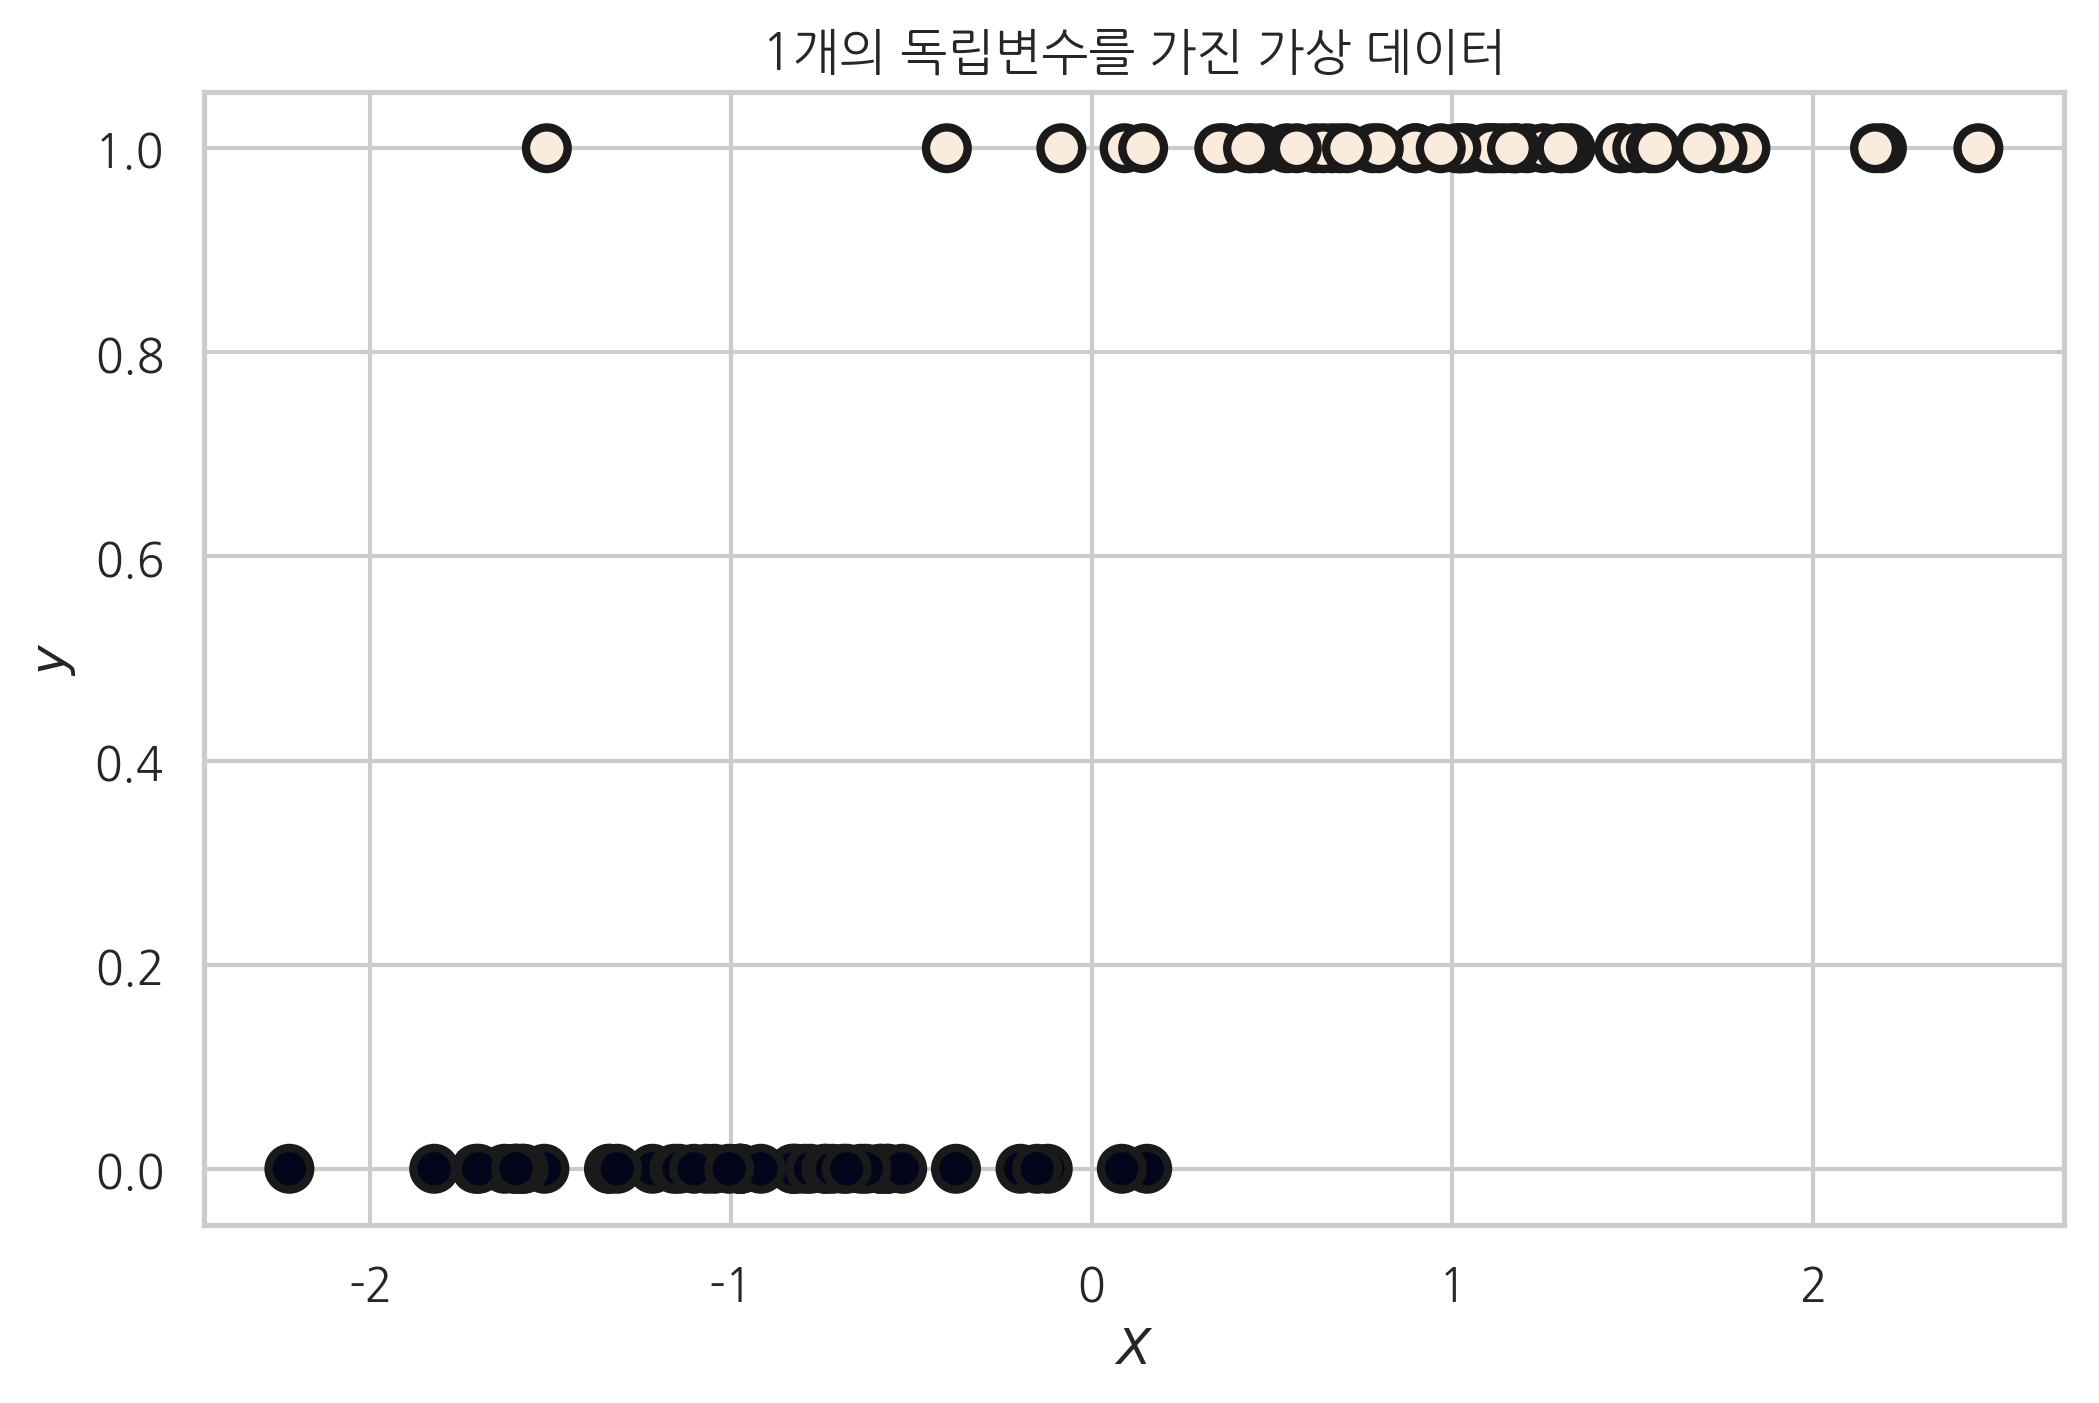

In [1]:
from sklearn.datasets import make_classification

plt.title("1개의 독립변수를 가진 가상 데이터")
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

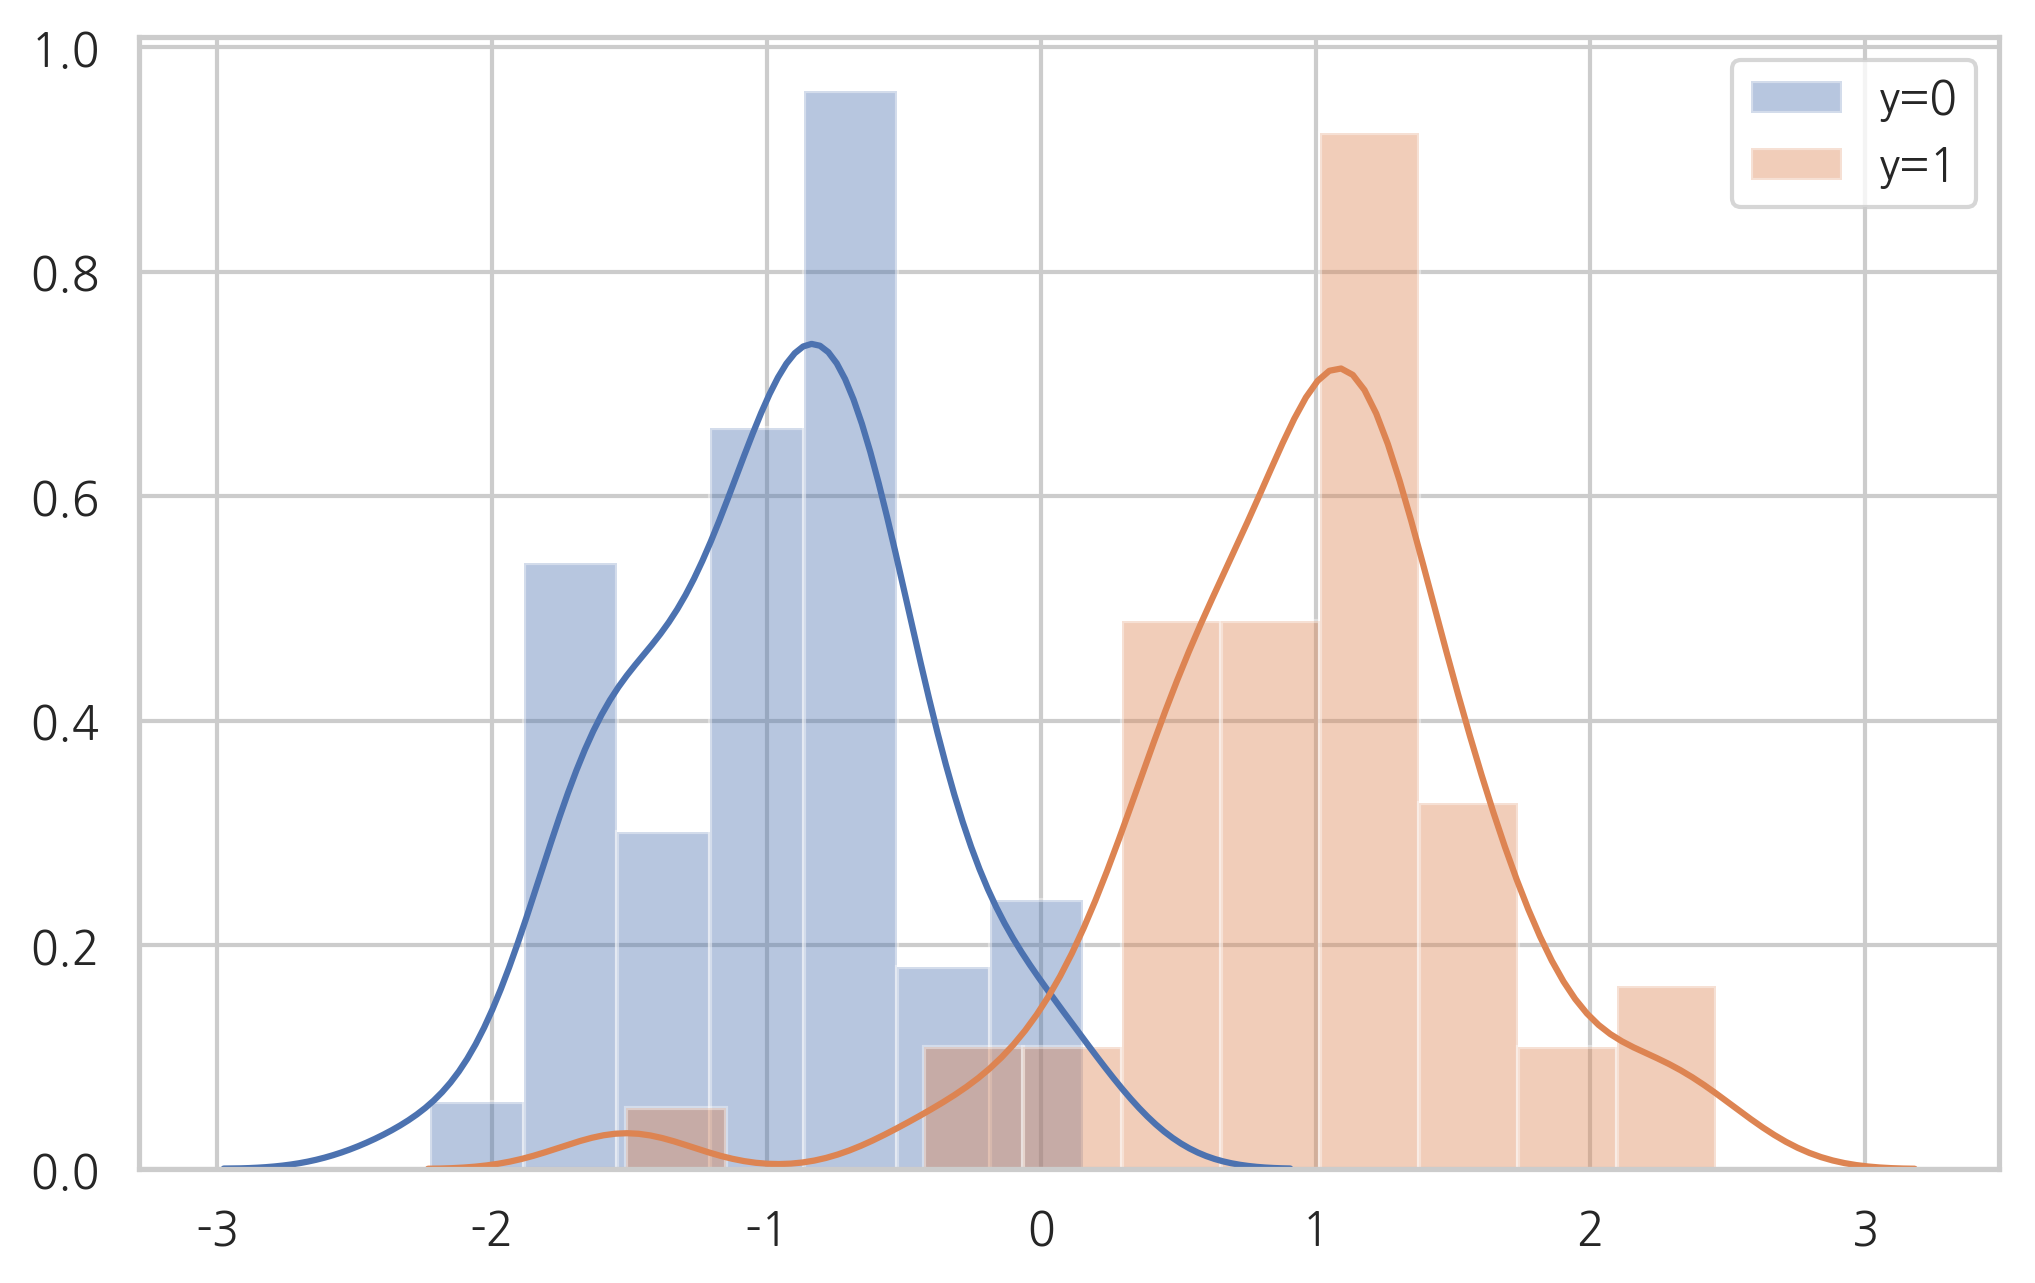

In [2]:
sns.distplot(X[y == 0], label="y=0")
sns.distplot(X[y == 1], label="y=1")
plt.legend()
plt.show()

이번에는 2개의 독립변수를 가지고 2개의 클래스를 가지는 데이터를 생성한다. 이 때, `n_informative` 변수를 1로 설정했다. 즉 2개의 독립변수 중 실제로 타겟 클래스와 상관관계가 있는 것은 1개의 독립변수이다. 

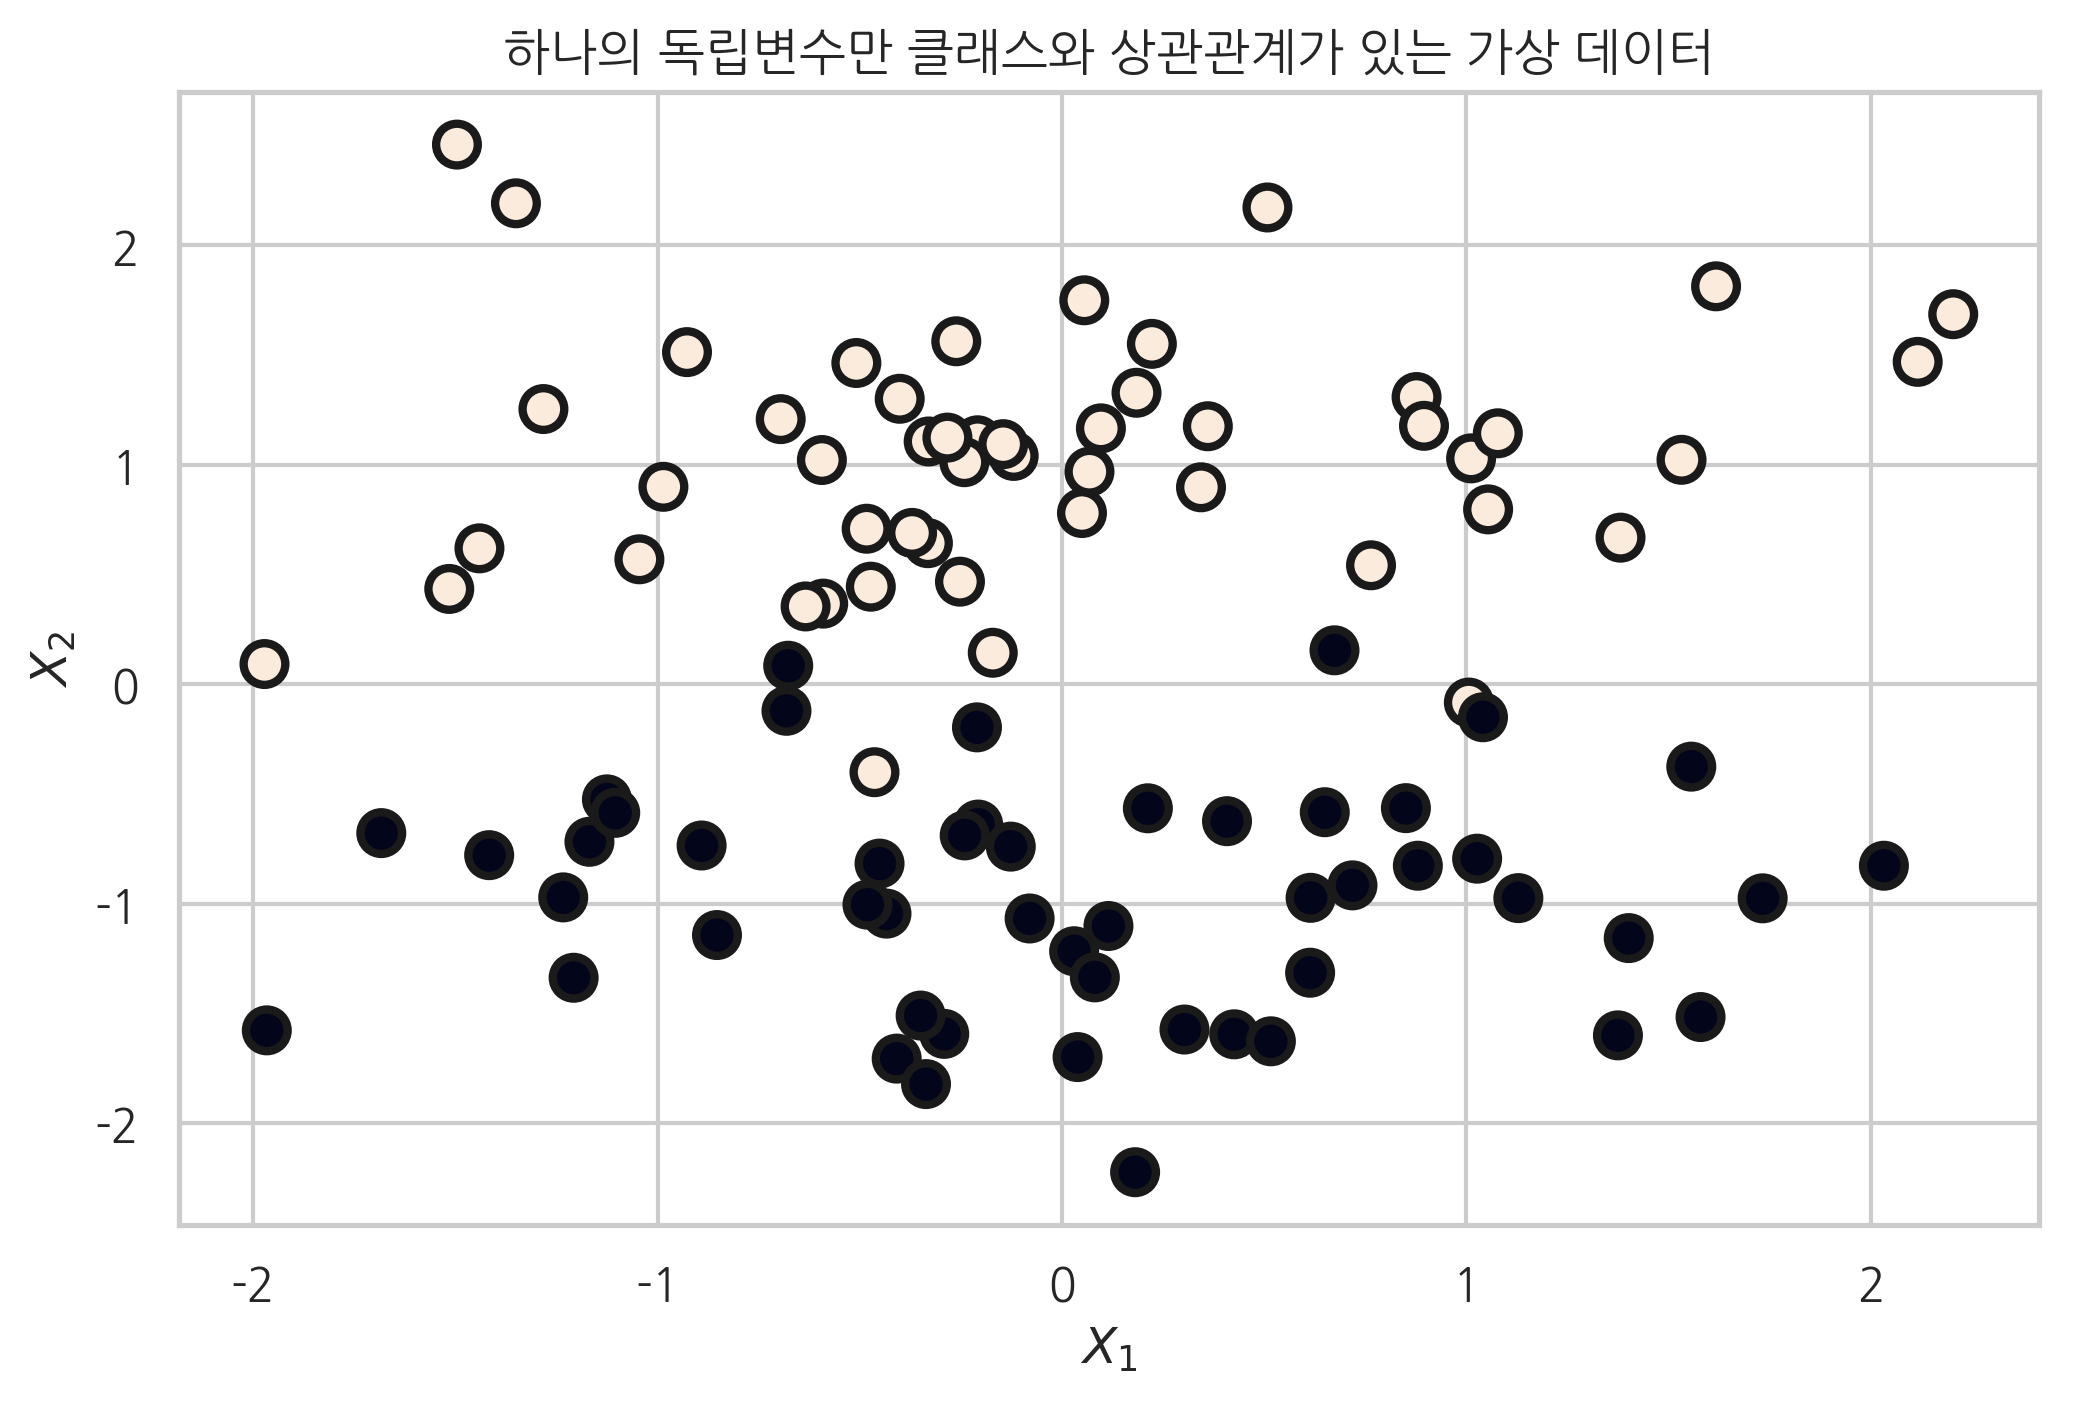

In [3]:
plt.title("하나의 독립변수만 클래스와 상관관계가 있는 가상 데이터")
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

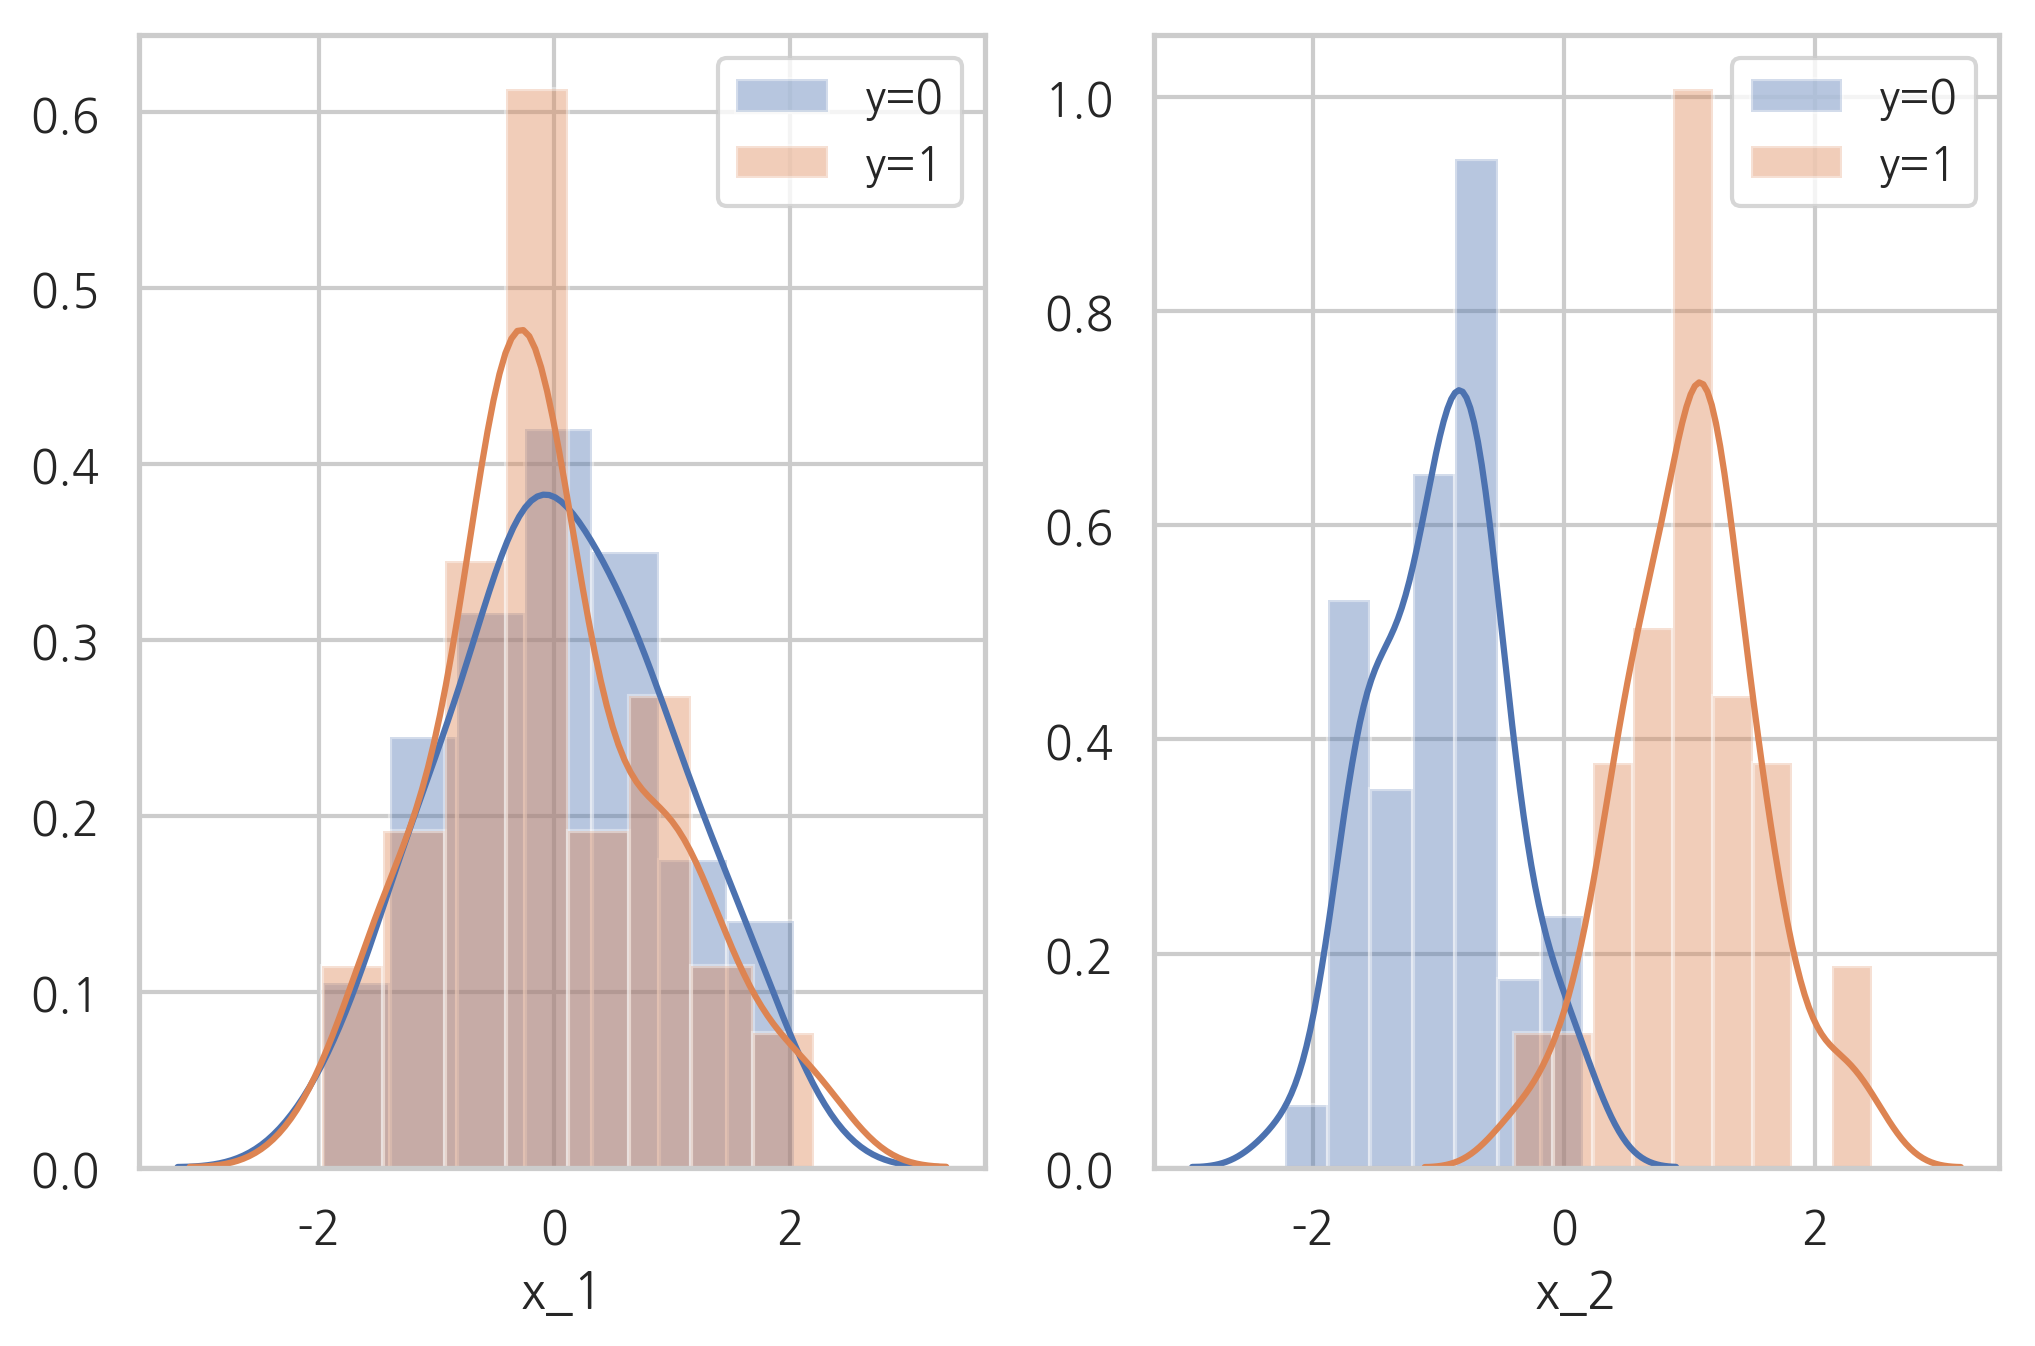

In [4]:
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

`n_informative` 변수를 2로 설정했을 때는 다음과 같이 두 변수 모두 클래스와 상관관계가 있는 가상 데이터가 생성된다. 

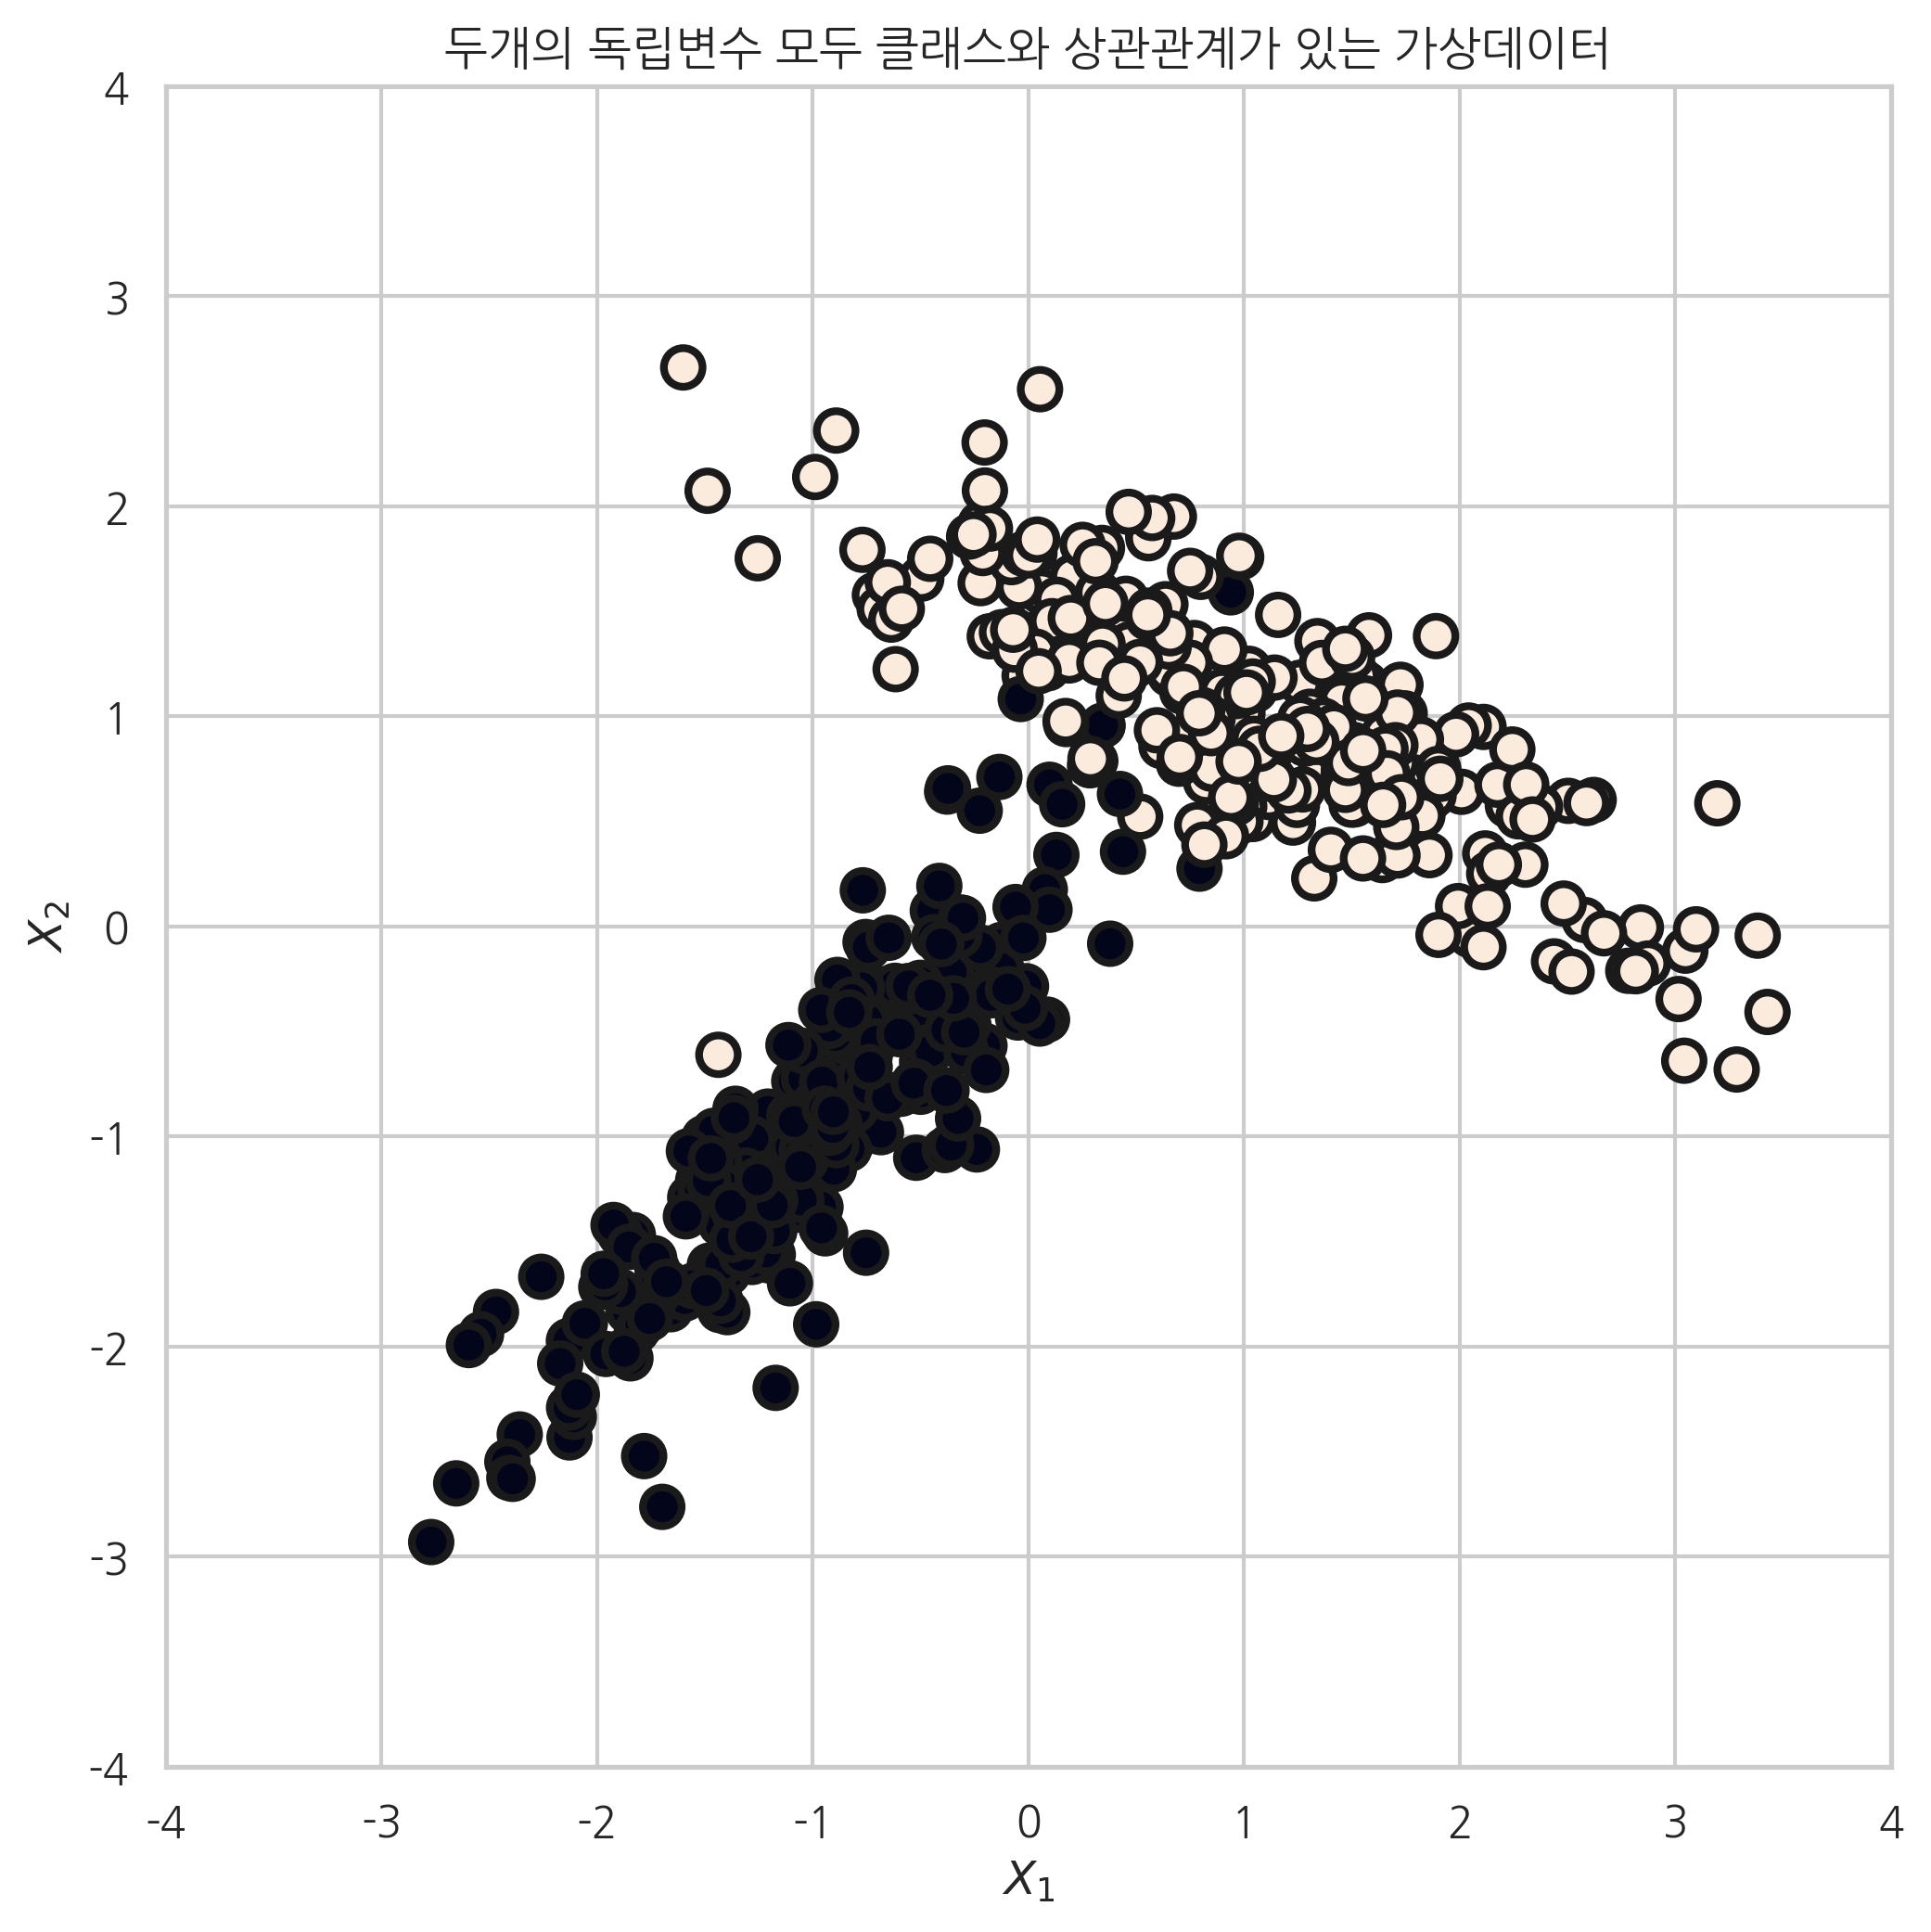

In [5]:
plt.figure(figsize=(8, 8))
plt.title("두개의 독립변수 모두 클래스와 상관관계가 있는 가상데이터")
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

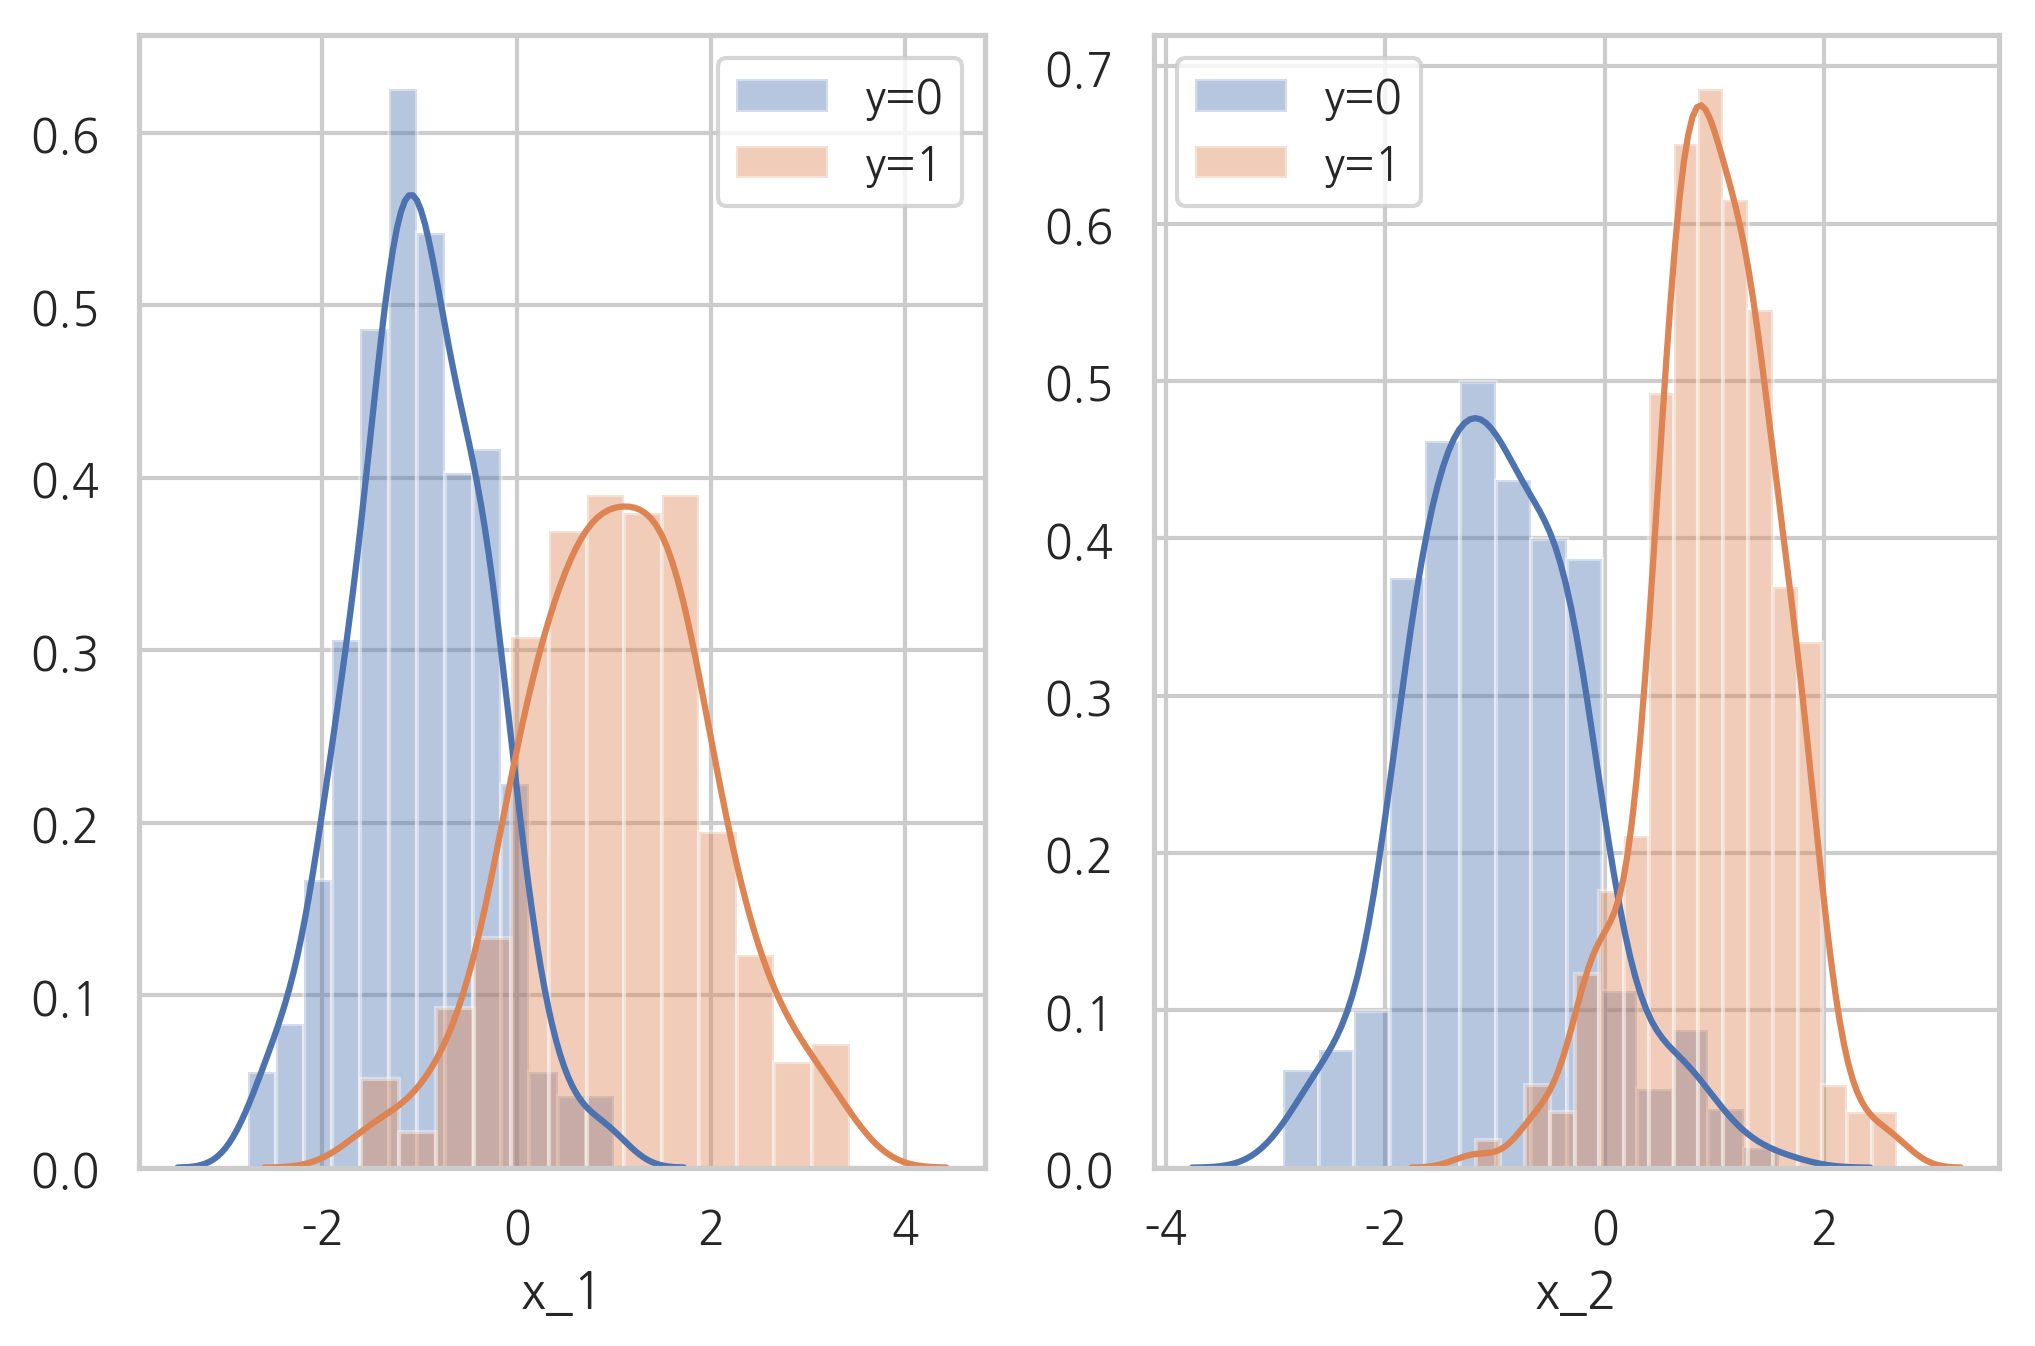

In [6]:
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

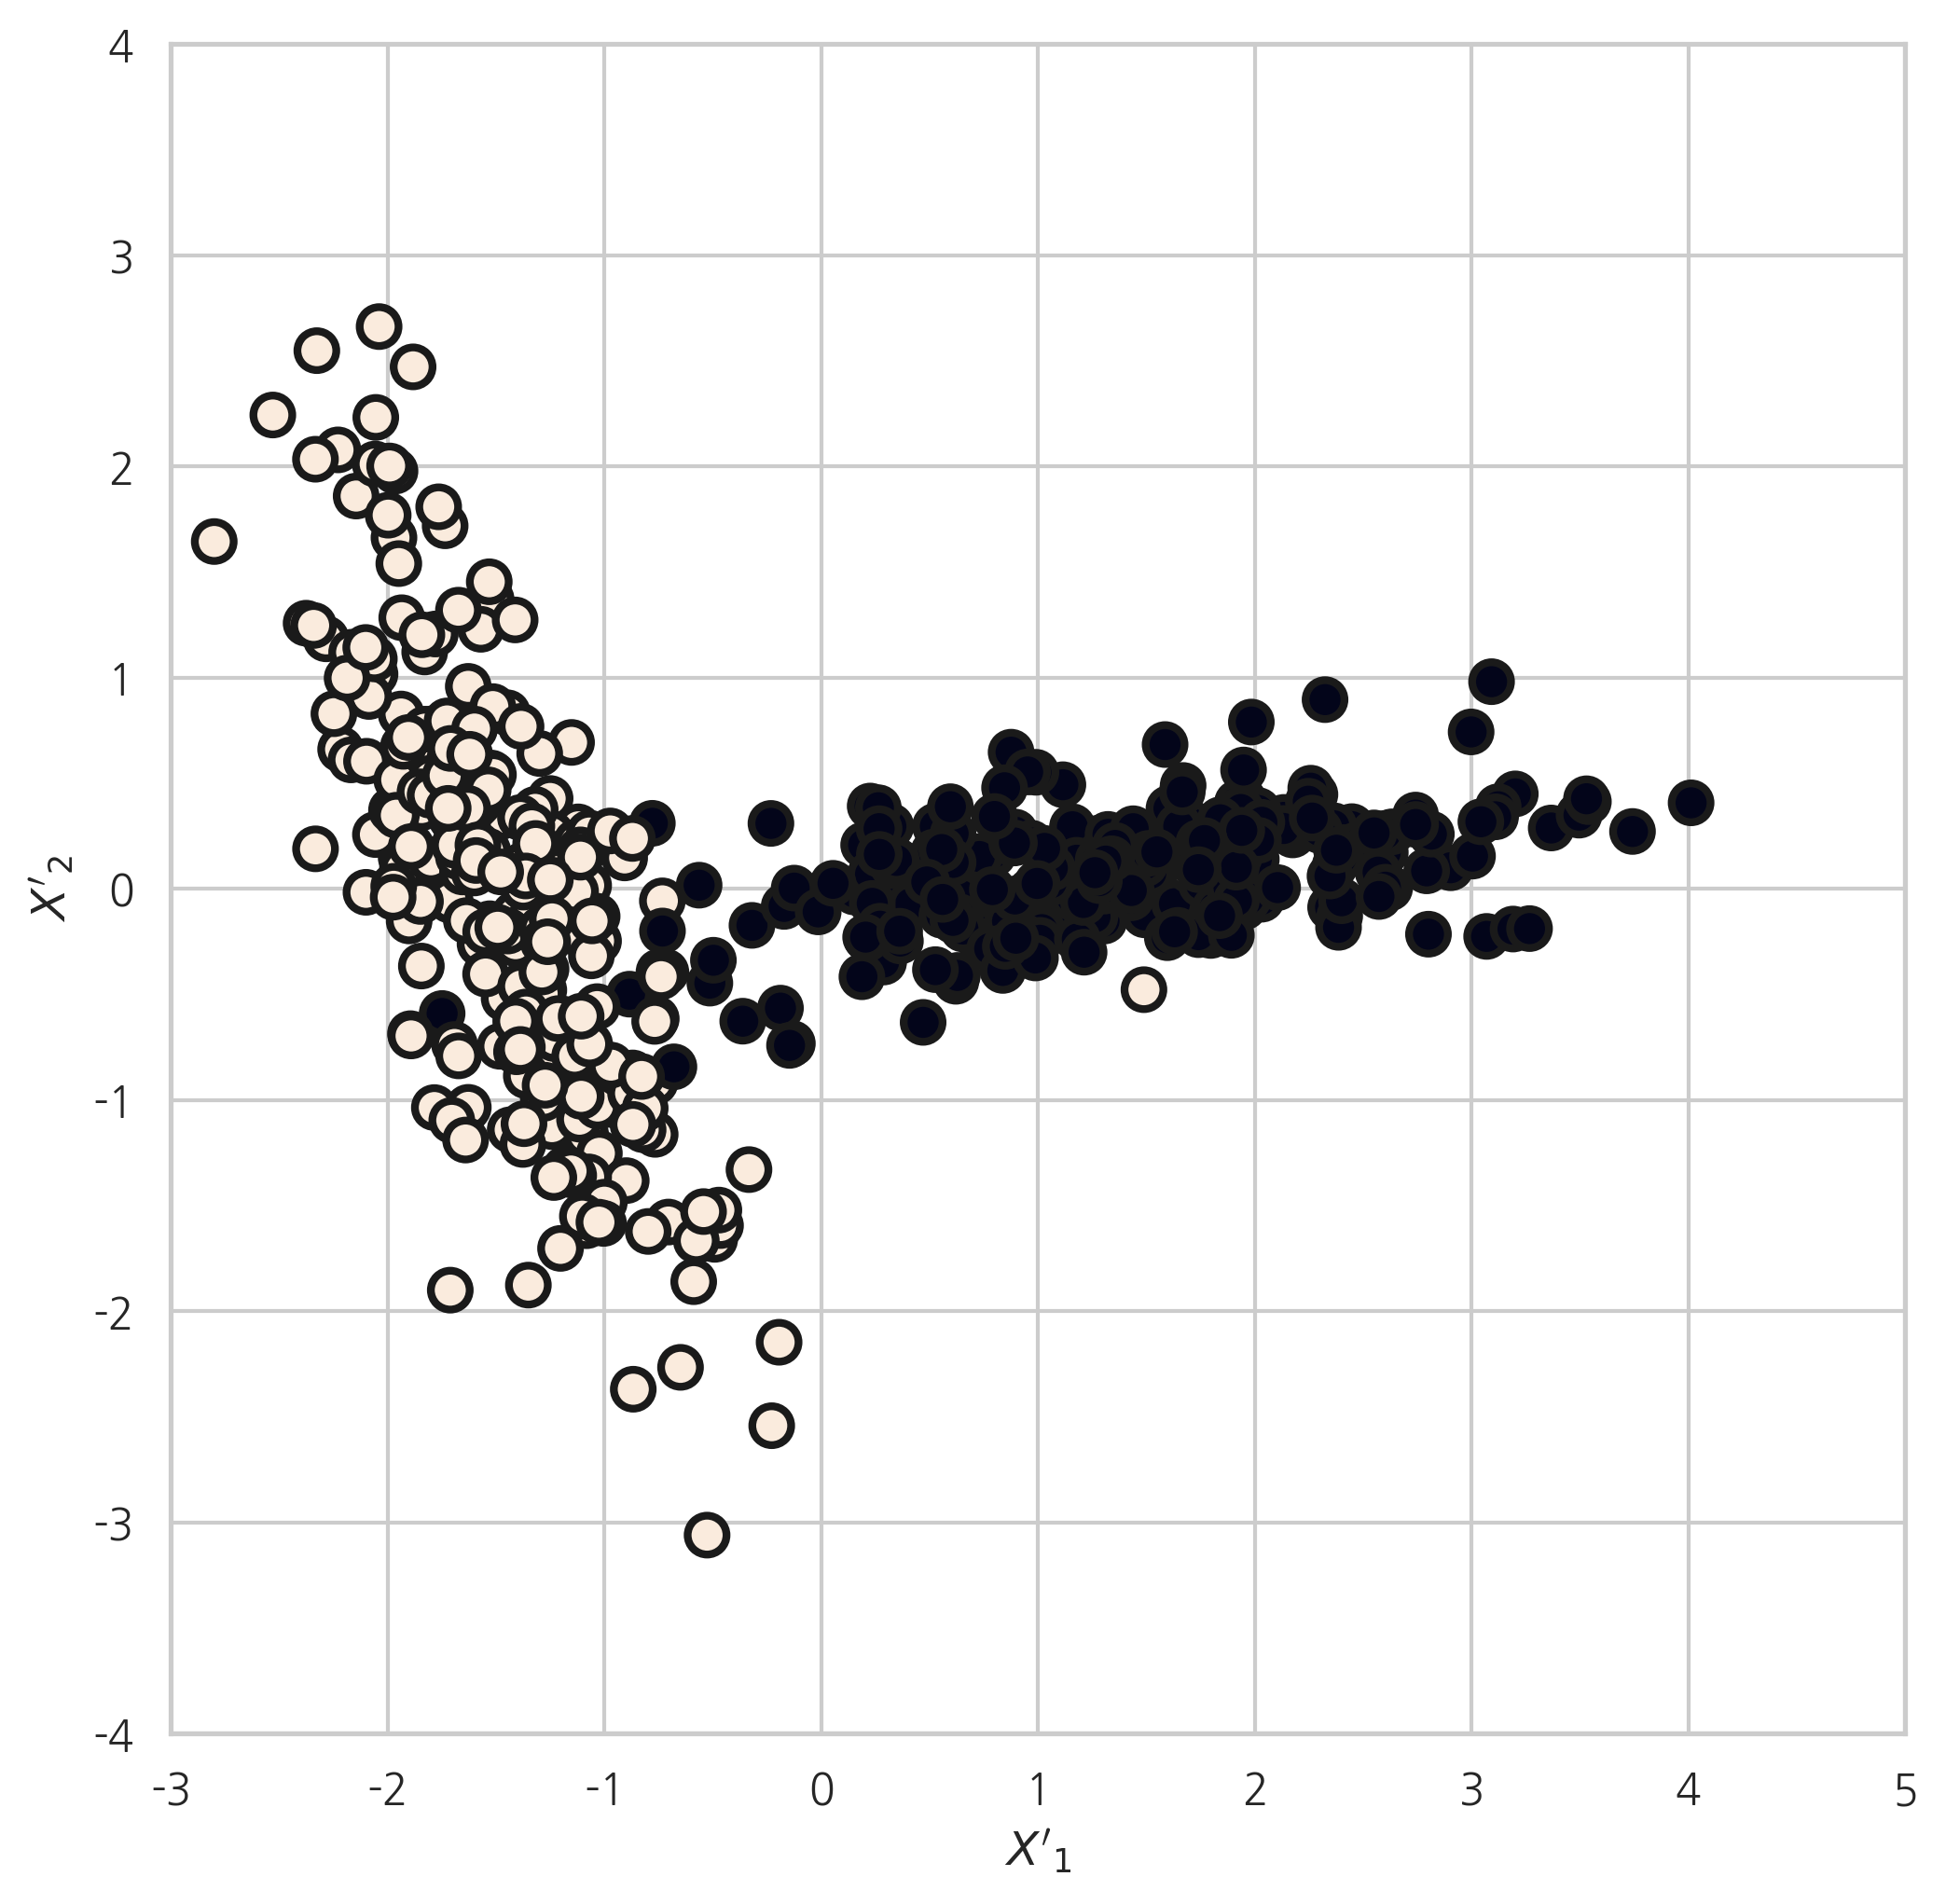

In [7]:
l, V = np.linalg.eig(X.T @ X)
X2 = -X @ V

plt.figure(figsize=(8, 8))
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X'_1$")
plt.ylabel("$X'_2$")
plt.xlim(-3, 5)
plt.ylim(-4, 4)
plt.show()

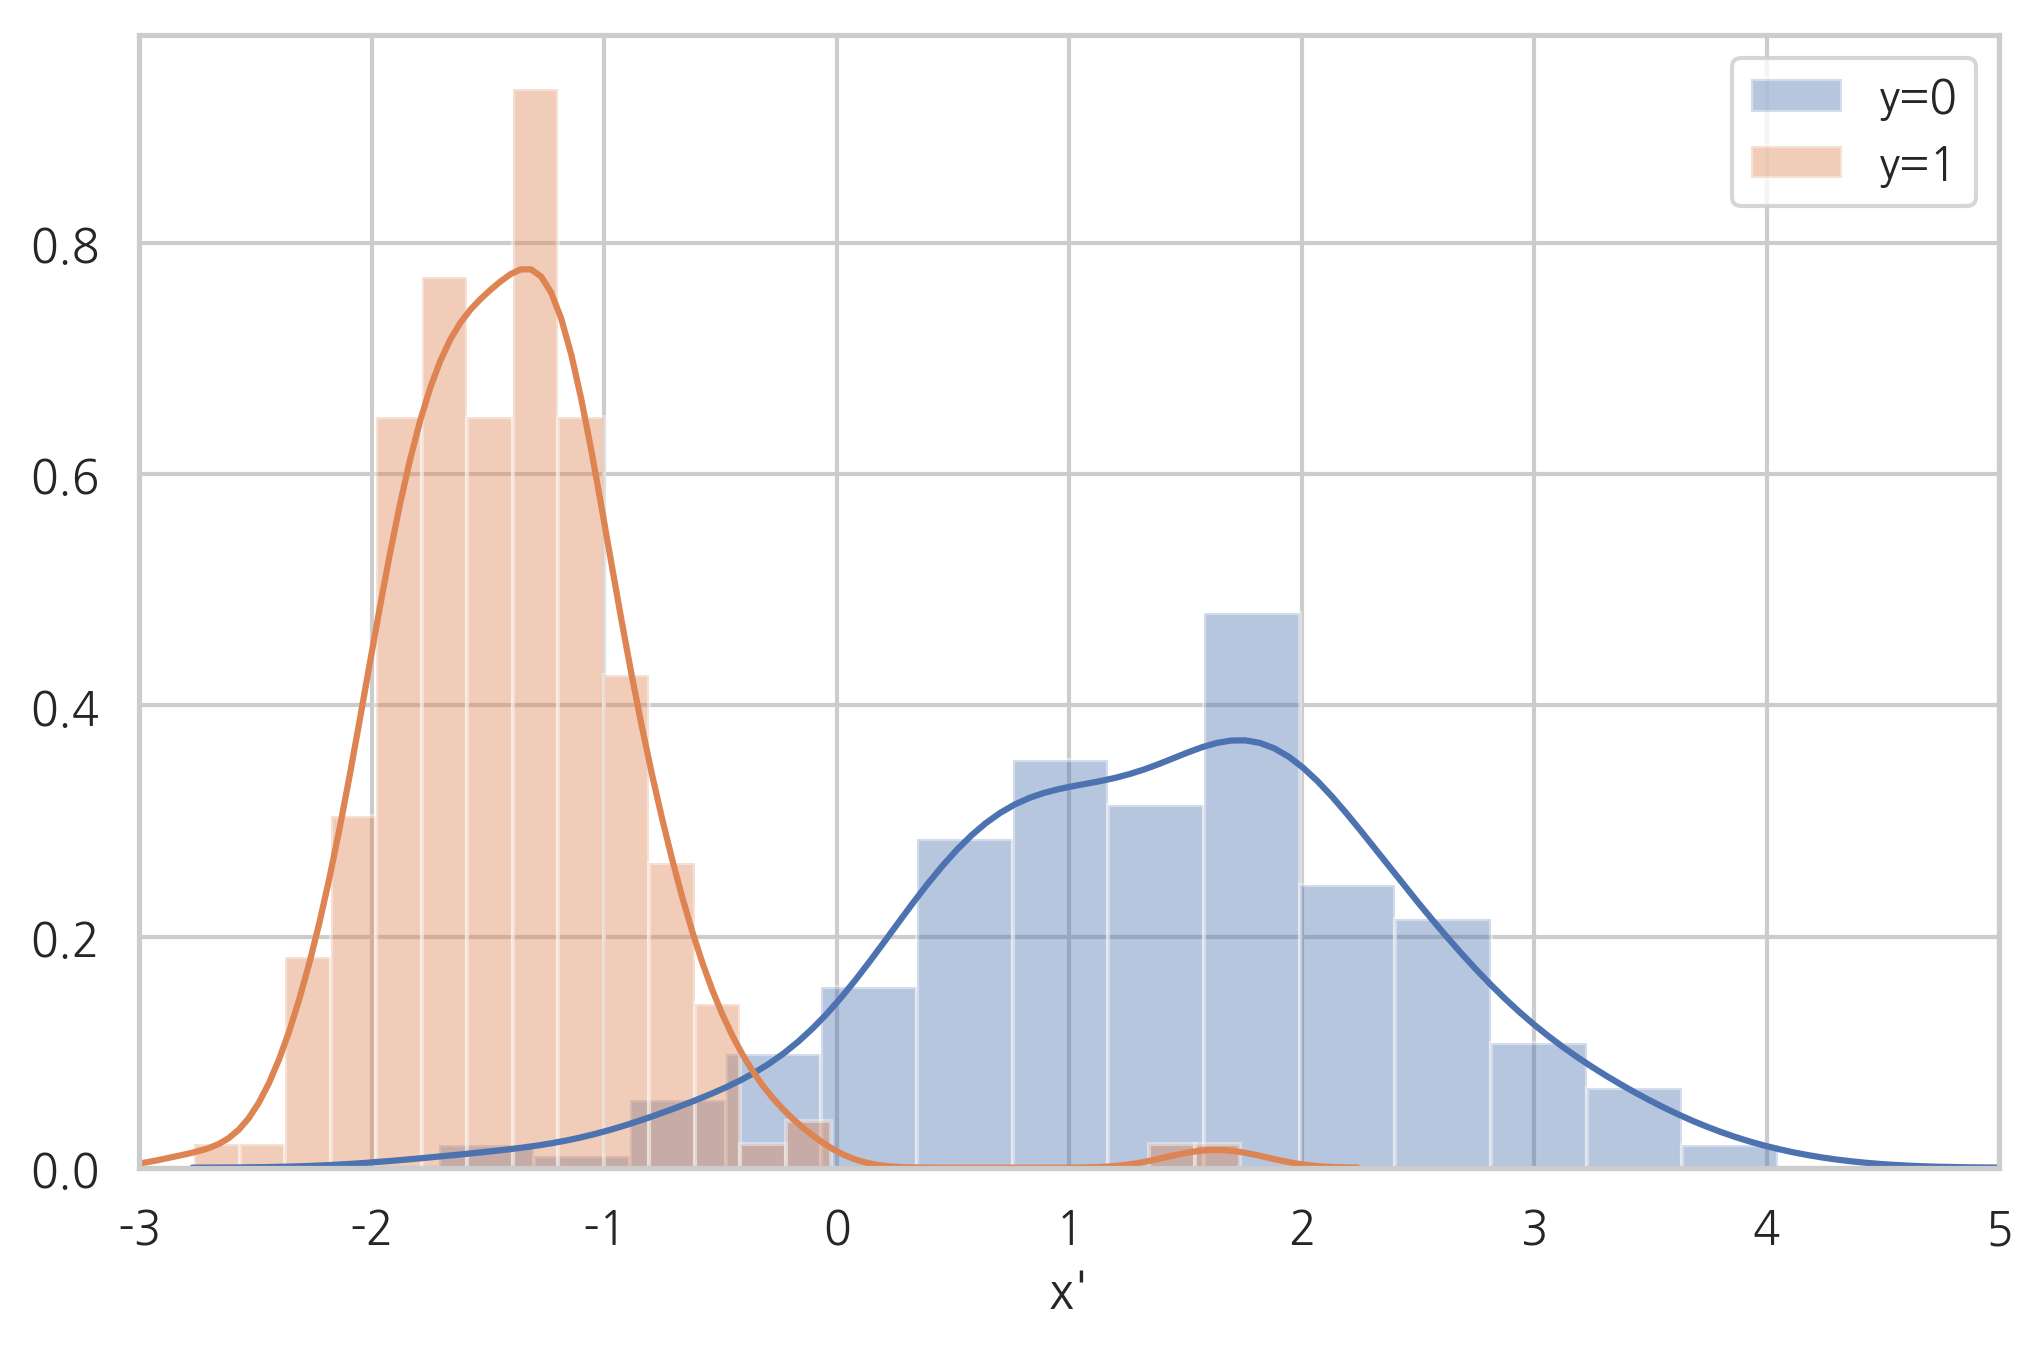

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

sns.distplot(X_pca[y == 0], label="y=0")
sns.distplot(X_pca[y == 1], label="y=1")
plt.legend()
plt.xlabel("x'")
plt.xlim(-3, 5)
plt.show()

클래스 별 데이터의 갯수에 차이를 주고 싶을 땐, `weights`인수를 설정하면 된다. 이는 추후 배울 비대칭데이터를 시뮬레이션 할 때 사용할 것이다. 다음 코드에서는 `weight`인수를 각 각 0.9, 0.1로 설정 했다.

각 클래스별 데이터의 갯수 - 0 클래스 : 90, 1 클래스 : 10


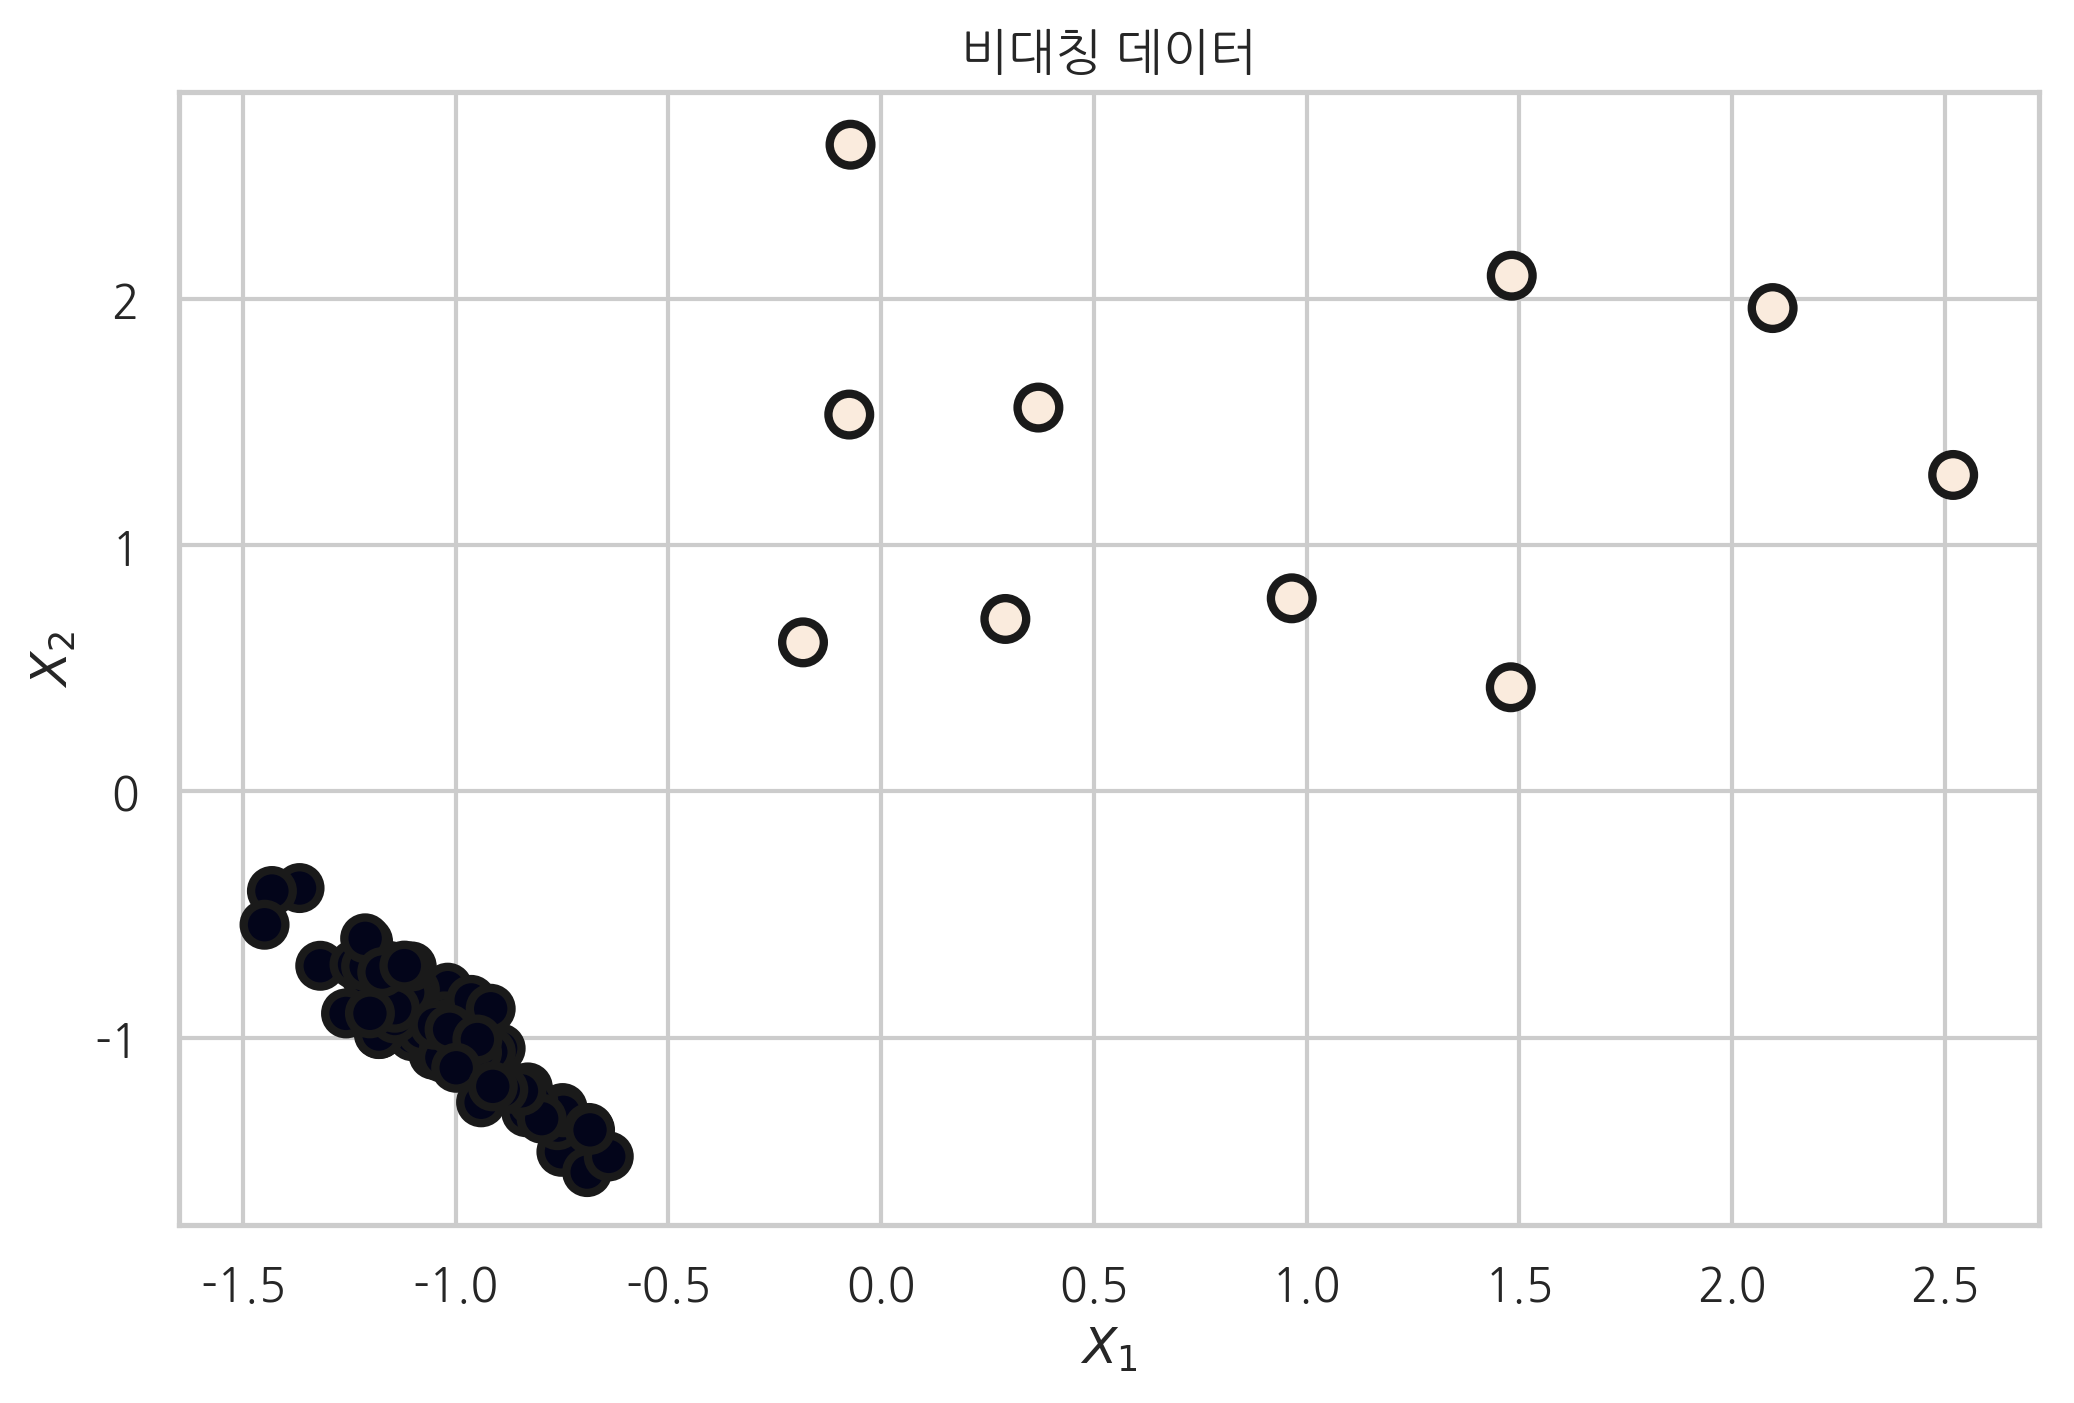

In [9]:
plt.title("비대칭 데이터")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
val, cnt = np.unique(y, return_counts=True)
print("각 클래스별 데이터의 갯수 - {} 클래스 : {}, {} 클래스 : {}".format(val[0], cnt[0], val[1], cnt[1]))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

`n_clusters_per_class` 인수를 2로 설정하여, 클래스 당 클러스터 갯수를 늘리면 다음 코드의 결과 처럼 클래스 끼리 잘 분리되어 있지 않은 가상데이터를 얻을 수 있다. 클래스 당 클러스터 갯수를 설정할 때 주의 할 점은 $\text{n_classes} \times \text{n_clusters_per_class}$ 는  $2^{\text{n_informative}}$보다 작거나 같도록 설정해야 한다는 것이다. 

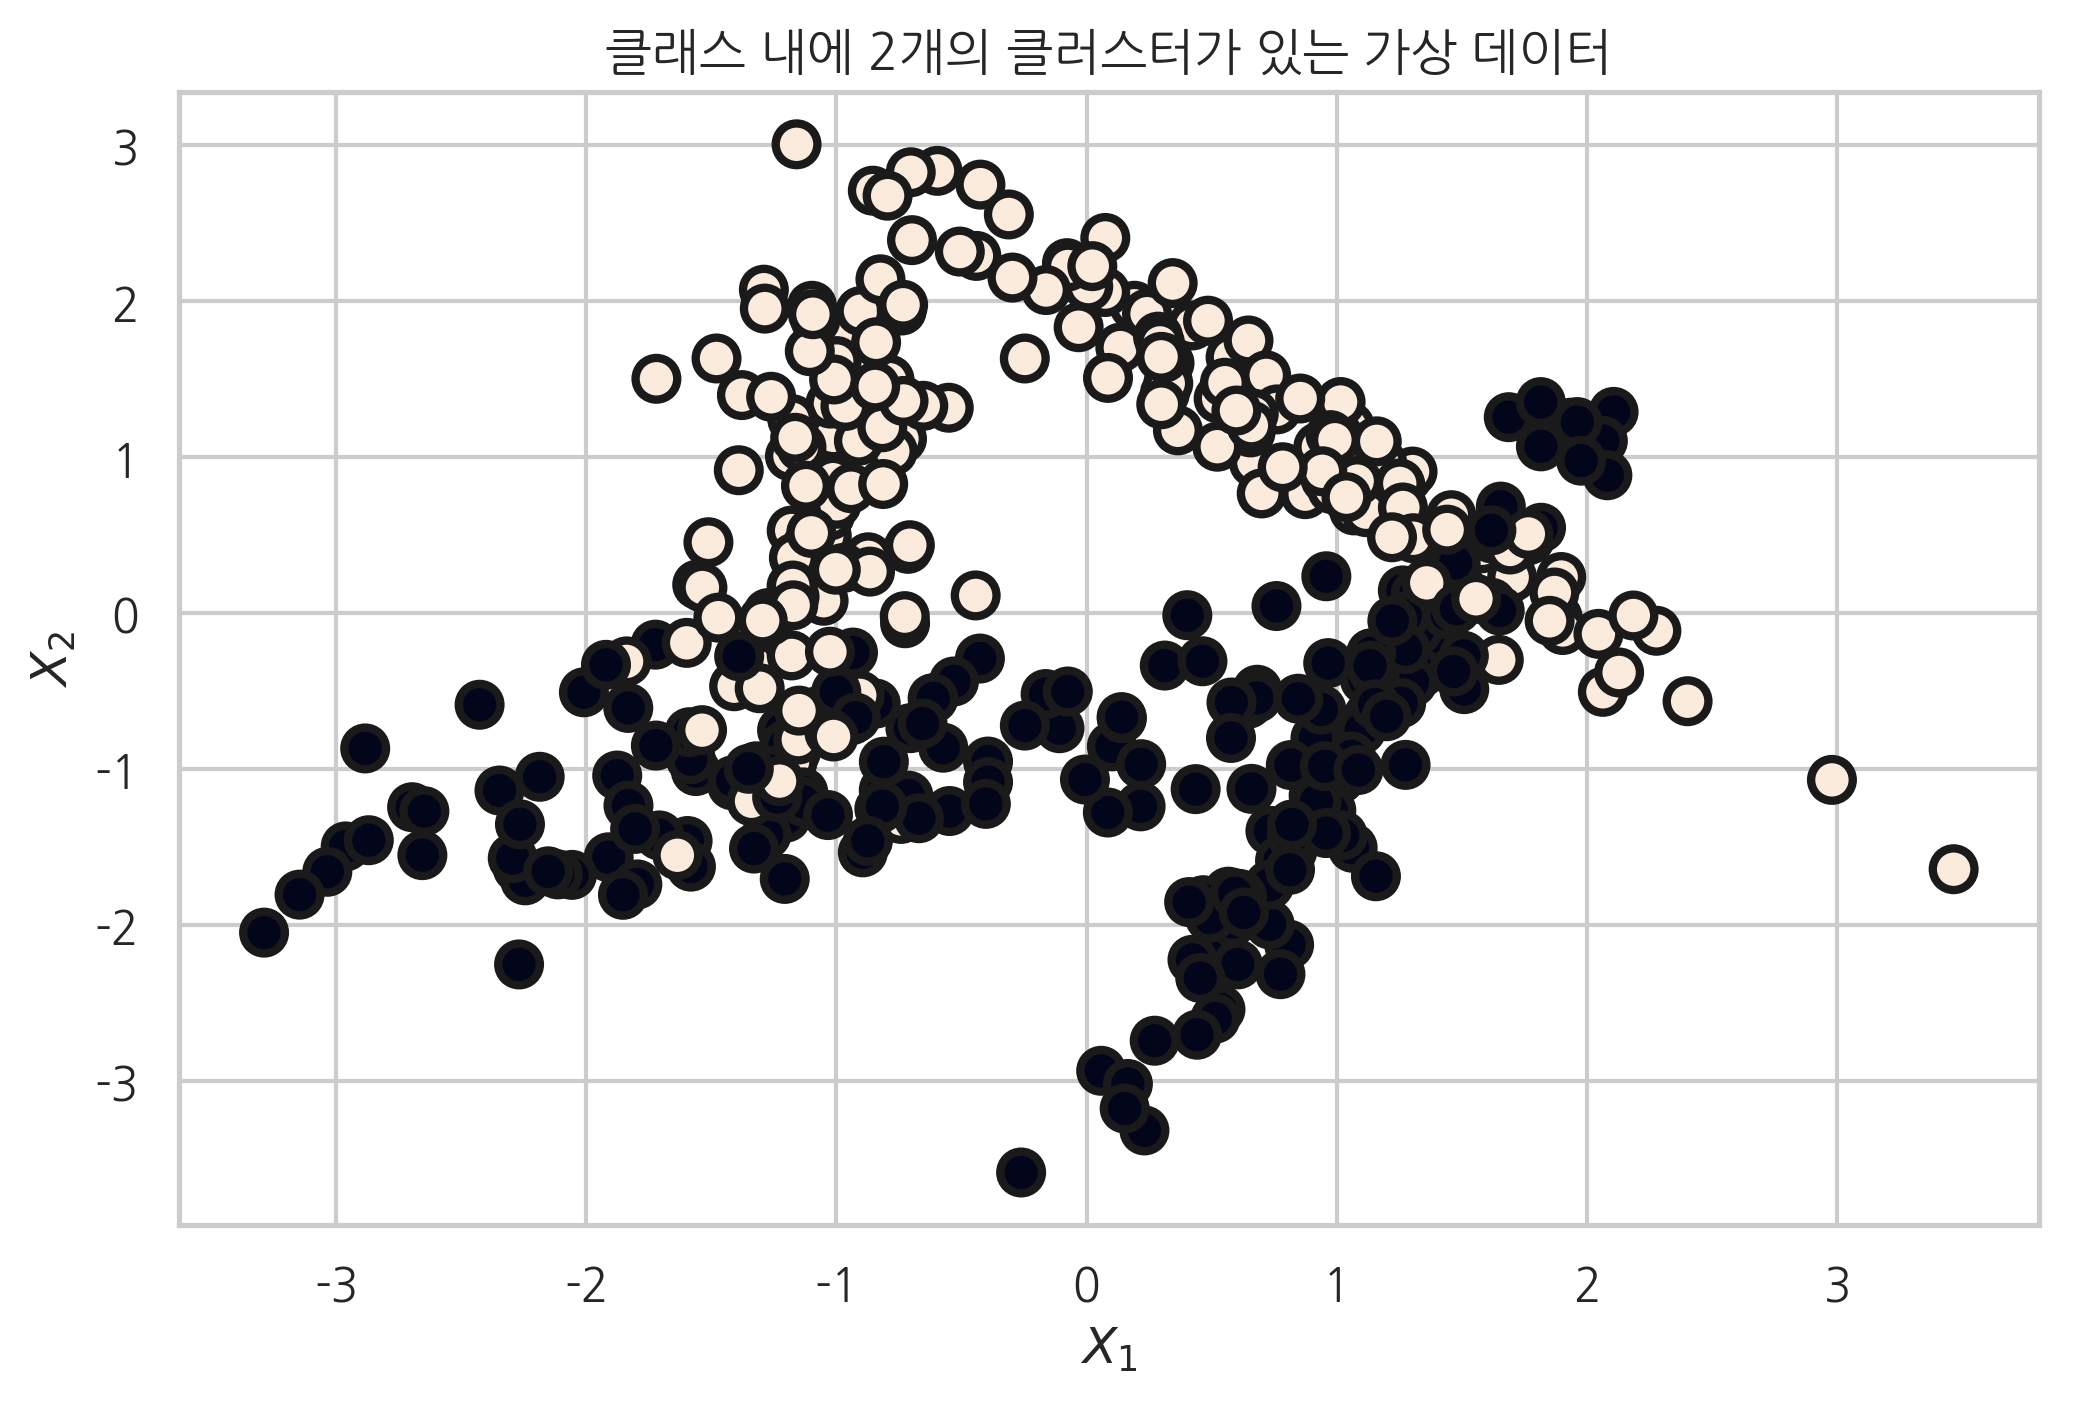

In [10]:
plt.title("클래스 내에 2개의 클러스터가 있는 가상 데이터")
X2, Y2 = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=2, random_state=0)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

다음은 다중 클래스를 가지는 가상데이터를 생성한 예이다. 

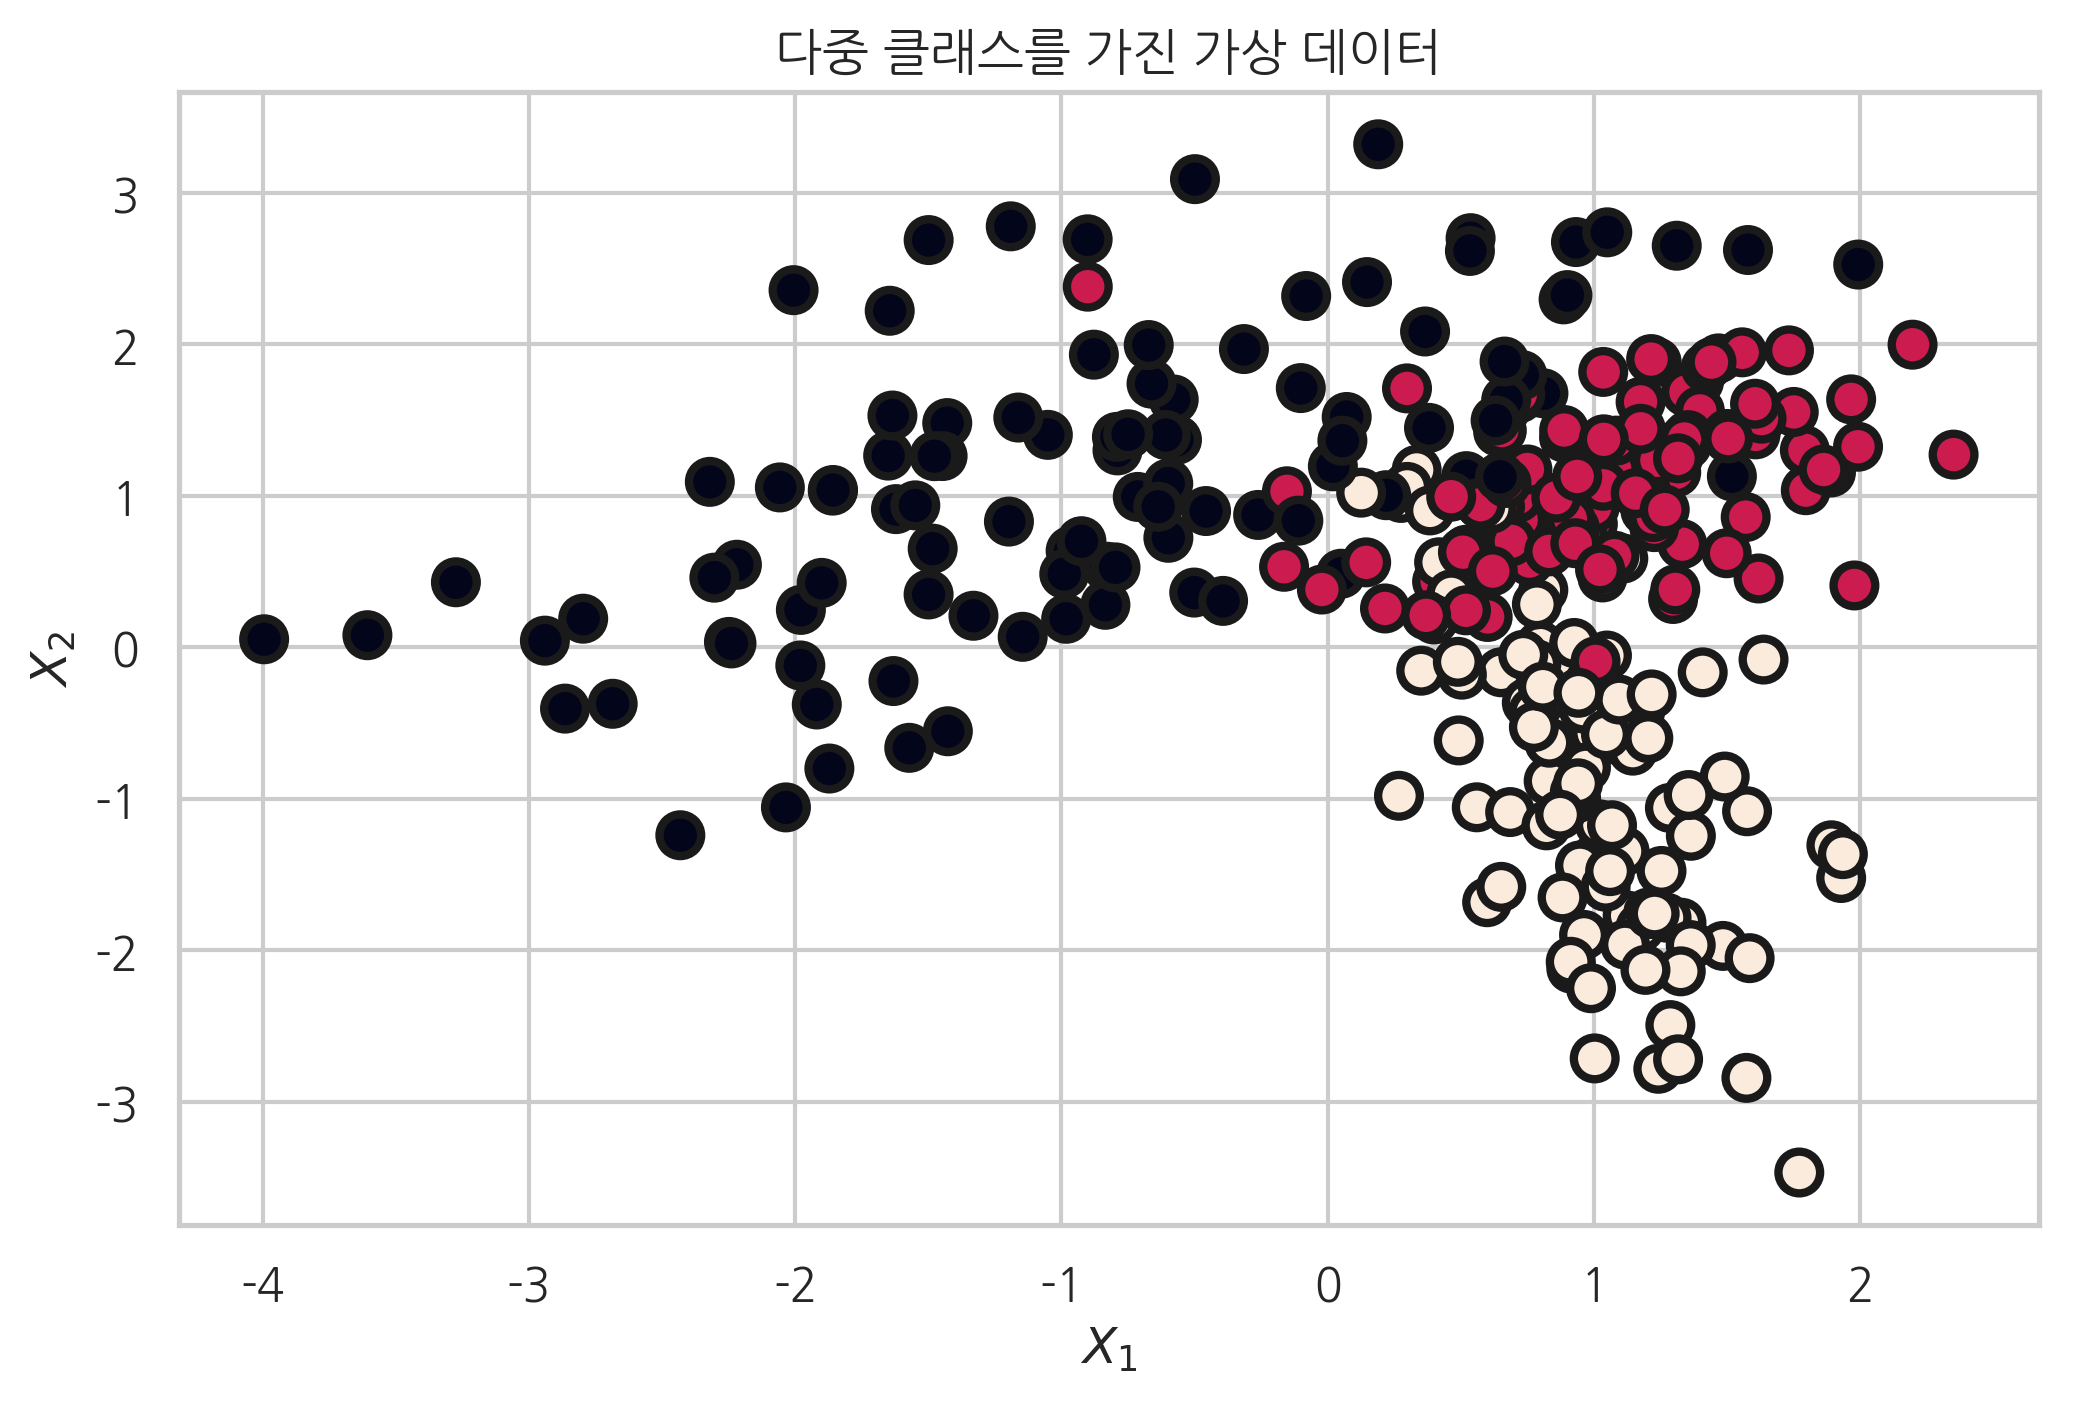

In [11]:
plt.title("다중 클래스를 가진 가상 데이터")
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## `make_blobs`

`make_blobs` 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다. 다음 데이터 생성 코드의 결과를 보면 `make_classification` 함수로 만든 가상데이터와  모양이 다른 것을 확인 할 수 있다. `make_blobs`는 보통 클러스링 용 가상데이터를 생성하는데 사용한다. `make_blobs` 함수의 인수와 반환값은 다음과 같다.

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `centers` : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
 * `cluster_std`: 클러스터의 표준 편차, 디폴트 1.0
 * `center_box`: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0)) 
   
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수


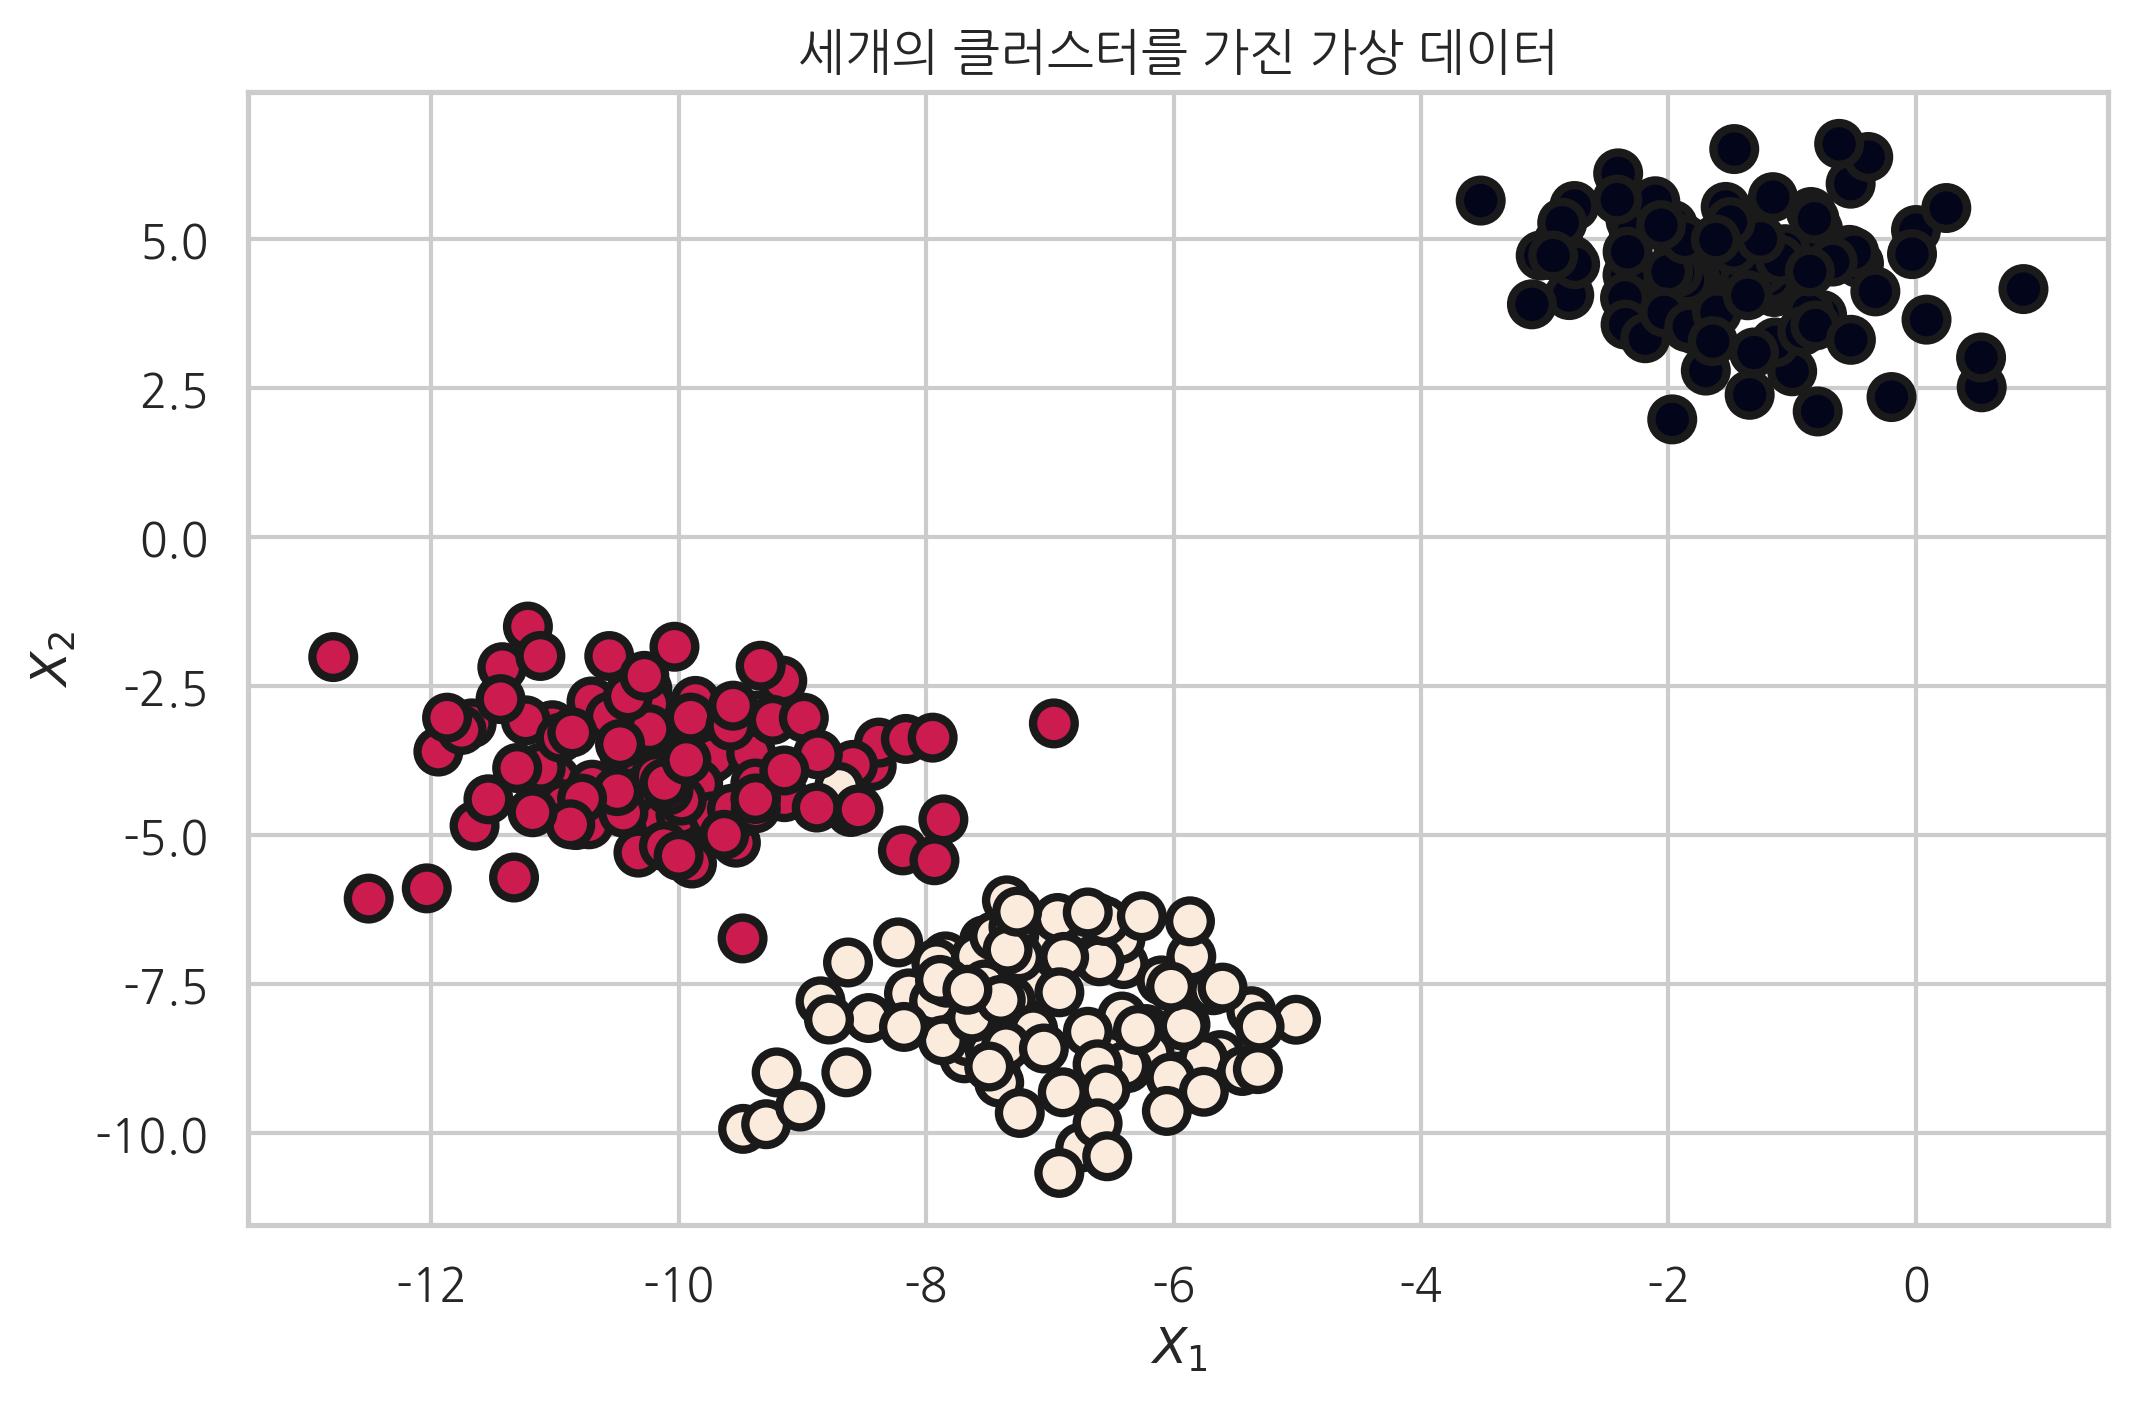

In [12]:
from sklearn.datasets import make_blobs

plt.title("세개의 클러스터를 가진 가상 데이터")
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## `make_moons`

`make_moons` 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성한다. `make_moons` 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `noise`: 잡음의 크기. 0이면 정확한 반원을 이룸

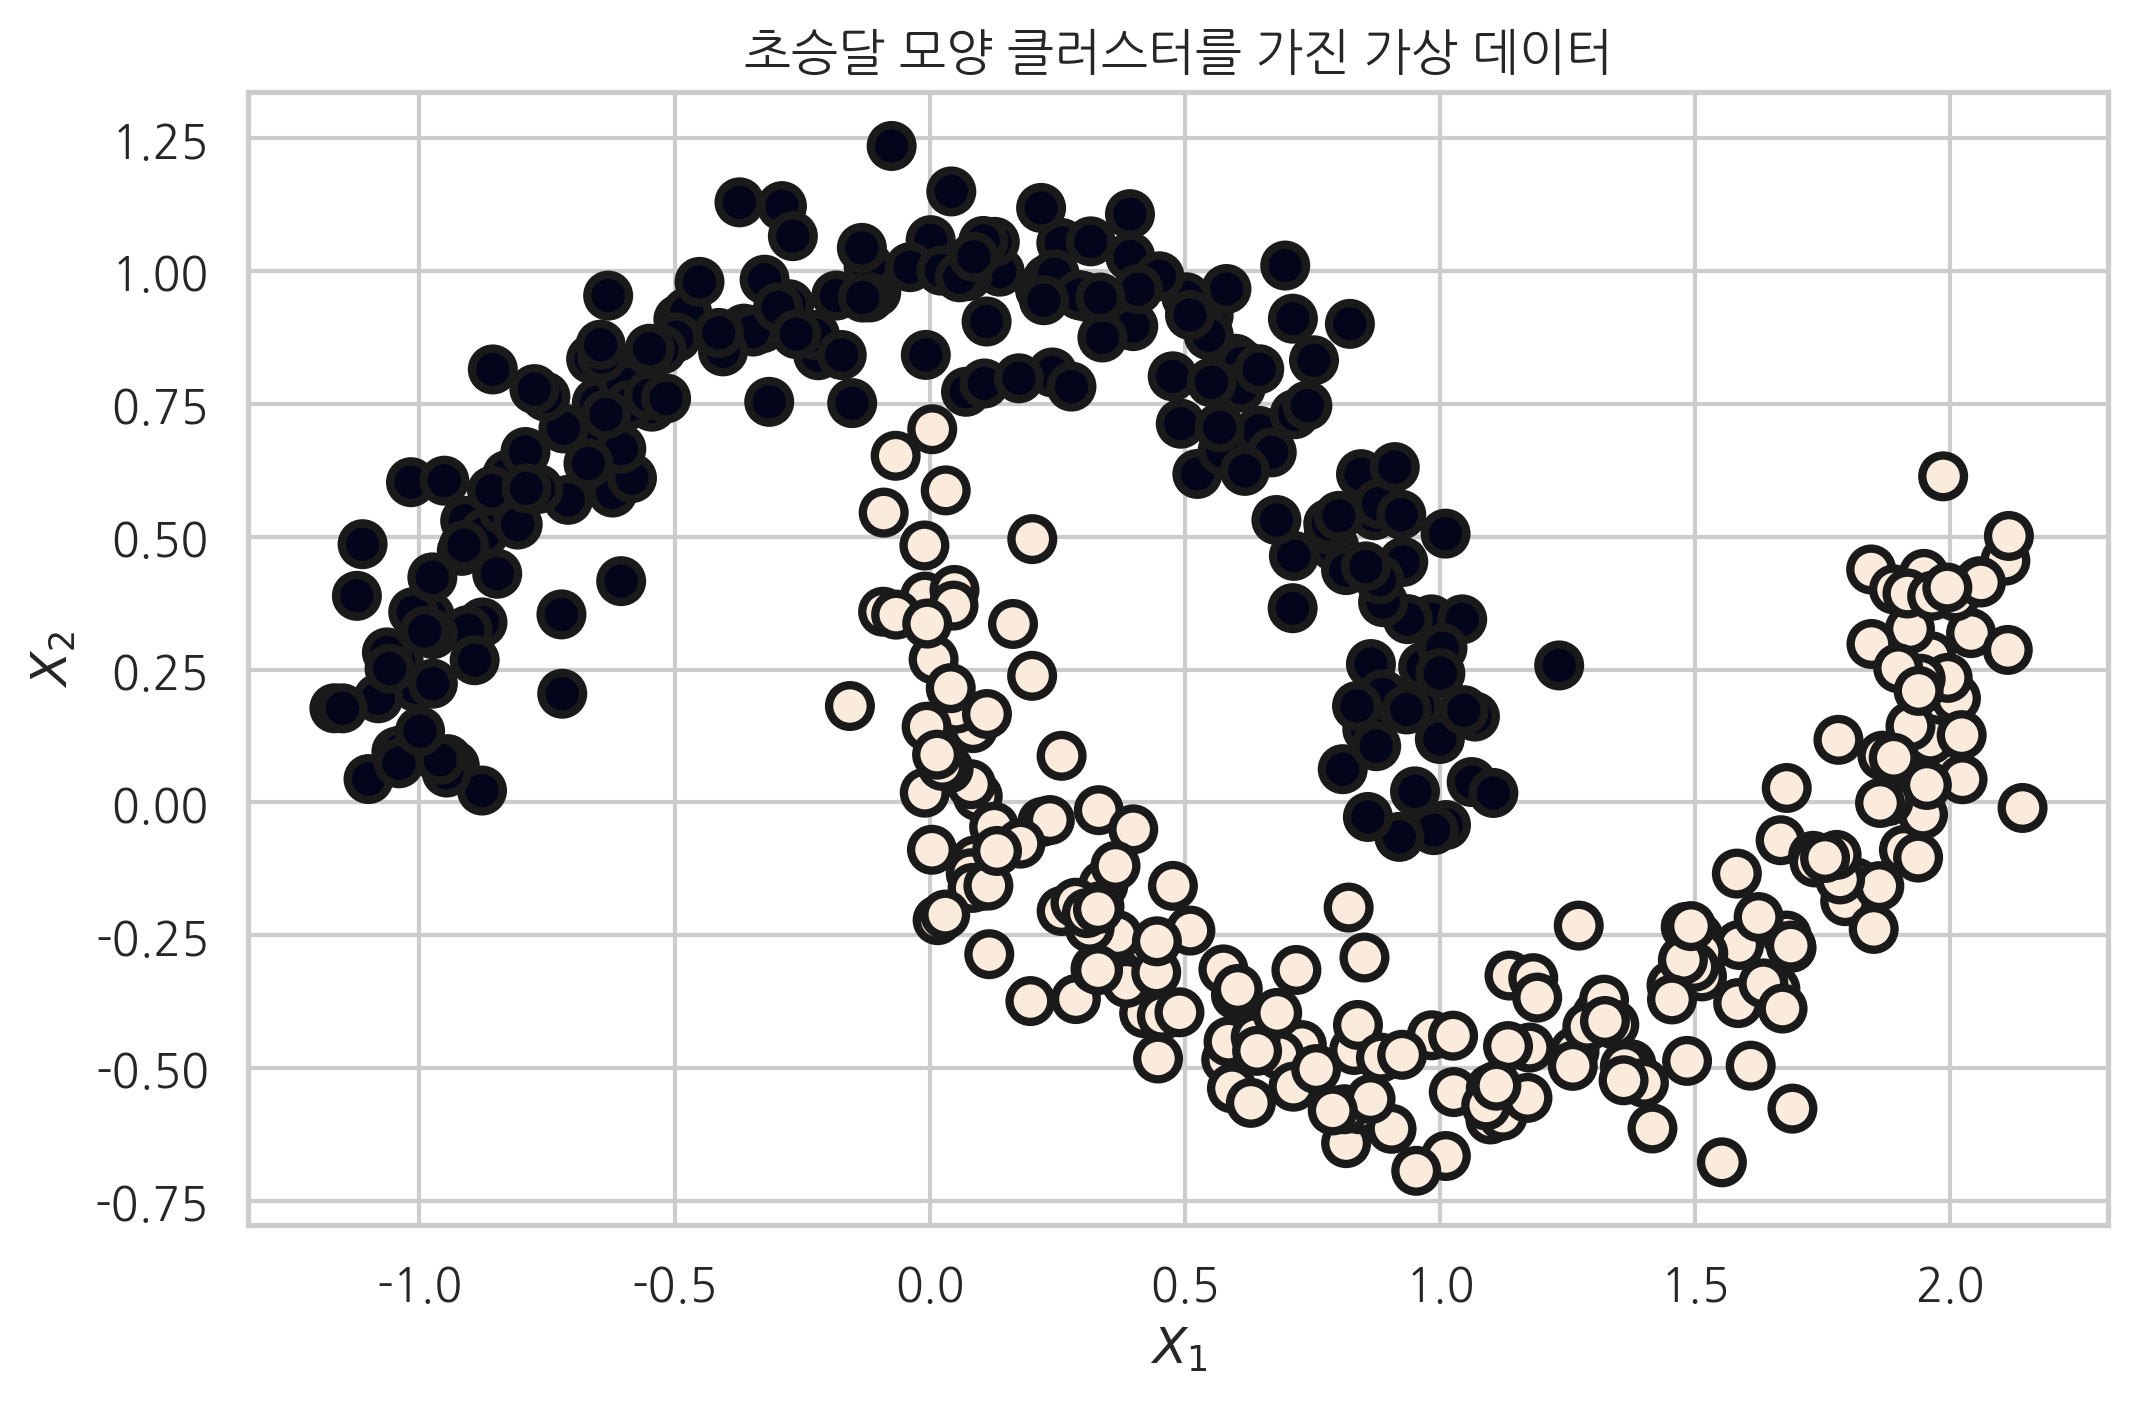

In [13]:
from sklearn.datasets import make_moons

plt.title("초승달 모양 클러스터를 가진 가상 데이터")
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## `make_gaussian_quantiles`

`make_gaussian_quantiles` 함수는 다차원 가우시안 분포의 표본을 생성하고 분포의 기대값을 중심으로 한 등고선으로 클래스를 분리한다. 함수의 인수와 반환값은 다음과 같다. 이 데이터는 타원형 형태의 닫힌 경계선으로만 분류할 수 있다.

* 인수:	
 * `mean`: 기댓값 벡터
 * `cov`: 공분산 행렬
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `n_classes` : 클래스의 수
    
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수

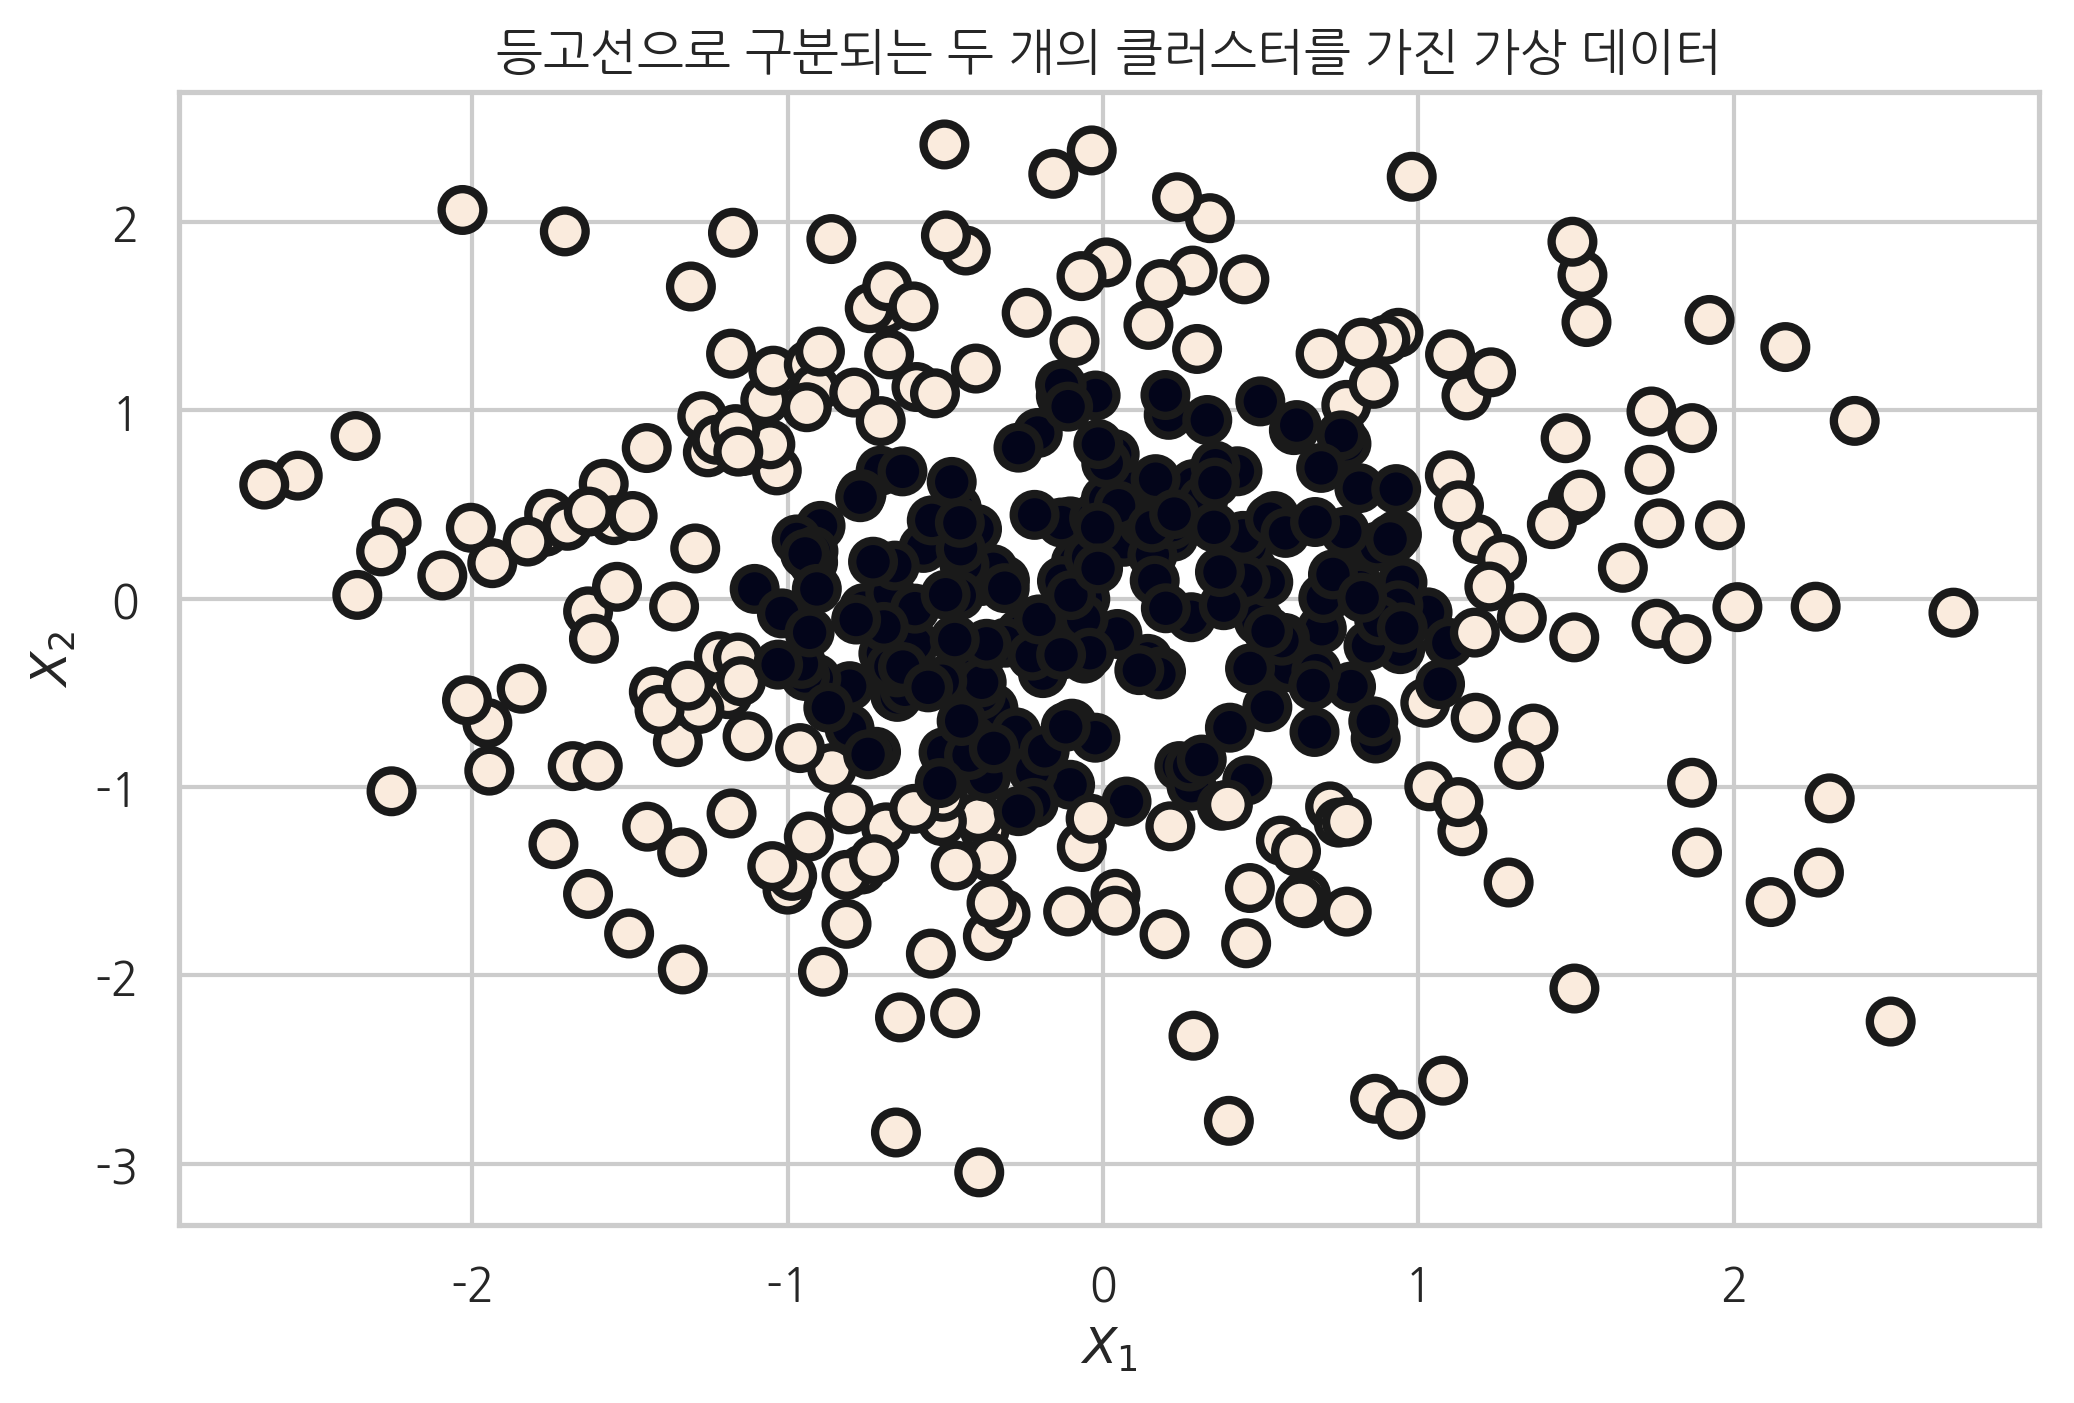

In [14]:
from sklearn.datasets import make_gaussian_quantiles

plt.title("등고선으로 구분되는 두 개의 클러스터를 가진 가상 데이터")
X, y = make_gaussian_quantiles(n_samples=400, n_features=2, n_classes=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()